# Task 1 – Context

This task sets the stage for the subsequent tasks as it determines the context for the experiments. For
that purpose:
1. You present a real scenario or a (realistic) fictitious situation, in which you are the data scientist.
You propose to solve a classification or regression problem and want to convince a customer
to greenlight your project.

The churn rate in businesses describes the percentage of customers leaving a subscription service over a time period. For the companies that offer these subsciption models it is common practize to monitor customer behavior to determine the likelihood of a customer to cancel their subscription to then offer special benefits so keep those customers that have a high dropout risk rate and keep the churn rate low. Similarly Universities offer a special type of subscription model in which Students pay their tuition fee to participate in courses and achieve degrees. By determining Students at high risks early, universities can intervene to support these students and offer targeted support. The Dataset presented in this project includes different features for students from XXX university and if they dropped out of university. Analysing this dataset and building a model to predict students that are likely to dropout can help universities to intervene and support students before they actually dropout 


2. You explain the value (monetary or otherwise) of solving the problem and what the customer
could do with the model you train (if successful).

Solving this task of correctly classifying student dropout to support them as soon as possible helps the students as well as the University. 
Preventing dropouts will increase the tuition revenue and keeps the costs that comes with the enrollment of new students low. 
For the students receiving support, this proactive approach can lead to better academic performance and a higher likelihood of successfully completing their education. Tailored interventions such as tutoring, counseling, or financial aid can address specific challenges and continue their academic journey.

3. Name two quality criteria that you will use in the following tasks to evaluate your models.
Explain your choice!

F1 dropout: Dropout prediction often involves an imbalance between "dropout" and "non-dropout" cases where there are more of the latter. The F1 score balances precision and recall, making it ideal for handling imbalanced datasets and ensuring the model accurately identifies at-risk students. 

Accuracy: While the F1 score already includes class imbalances, the accuracy score for classification will give a broader measurment of the models actual performance.

# Task 2 – The Data
Load and present a dataset (respect the conditions in Section 2). This will be the raw data, that you’ll
exploit in the subsequent tasks.


• Explain how the dataset is suitable for the project from Task 1

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

In [2]:
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

# Combine the features and target into one DataFrame
df = pd.concat([X, y], axis=1)
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Description

The dataset consists of **4000 students** from different University around the world. There are **37 variables** measured for each student, with no missing values. These variables are grouped as follows:

## Demographic Variables
- **Age**: The student's age.  
- **Gender**: Male or female.  
- **Parental Information**: Includes education level and employment status.  
- These factors provide insights into the students' personal and social backgrounds.

## Academic Variables
- **Previous Education**: Information such as high school GPA or type of diploma.  
- These variables help contextualize the students' preparedness for university-level studies.

## Behavioral Variables
- **Credits Received Each Semester**: Number of credits earned.  
- **Grades**: Academic performance metrics.  
- **Attendance Records**: Tracking student attendance in classes.  
- These variables reflect the students' engagement and performance throughout their degree.

## Other Variables
- **Extracurricular Activities**: Participation in clubs, sports, or other activities.  
- **Use of Academic Resources**: Frequency of library visits or use of academic tools.  
- **Course Enrollment Details**: Information about the courses students are taking.  
- These factors capture the broader aspects of student life and involvement in campus activities.

## Target Variable
The target variable categorizes students into three possible outcomes:
- **Dropout**: Students who did not complete their degree.  
- **Graduate**: Students who successfully completed their degree.  
- **Enrolled**: Students who are still actively pursuing their degree.  

This comprehensive dataset provides a strong foundation for modeling dropout risks and understanding the factors influencing student success.

___

Further down, the values of each feature are described in detail.


| **Feature**                                     | **Description**                                                                                                                                                 |
|-------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Marital Status**                              | Student's marital status: 1: Single, 2: Married, 3: Widower, 4: Divorced, 5: Facto Union, 6: Legally Separated                                               |
| **Application Mode**                            | Admission process type: 1: 1st phase general, 2: Ordinance 612/93, 57: International change                                                                  |
| **Application Order**                           | Priority of course choice: 0: First choice, 9: Last choice                                                                                                      |
| **Course**                                      | Enrolled course (e.g., 33: Biofuel Tech, 9130: Equinculture).                                                                                                  |
| **Daytime/Evening Attendance**                  | Course schedule: 1: Daytime, 0: Evening                                                                                                                        |
| **Previous Qualification**                      | Student’s highest education level before enrolling: 1: Secondary education, 5: Doctorate                                                                    |
| **Previous Qualification (Grade)**              | Grade from the previous qualification (0-200).                                                                                                                 |
| **Nationality**                                 | Student’s nationality (e.g., 1: Portuguese, 105: Russian).                                                                                                    |
| **Mother's Qualification**                      | Mother's highest education level (e.g., 1: Secondary, 44: Doctorate).                                                                                         |
| **Father's Qualification**                      | Father's highest education level (e.g., 1: Secondary, 44: Doctorate).                                                                                         |
| **Mother's Occupation**                         | Mother's occupation category (e.g., 1: Legislator, 9: Unskilled worker).                                                                                      |
| **Father's Occupation**                         | Father's occupation category (e.g., 1: Legislator, 9: Unskilled worker).                                                                                      |
| **Admission Grade**                             | Grade used for university admission (0-200).                                                                                                                  |
| **Displaced**                                   | Whether the student lives far from their residence: 1: Yes, 0: No                                                                                           |
| **Educational Special Needs**                   | Presence of special education needs: 1: Yes, 0: No                                                                                                           |
| **Debtor**                                      | Tuition fee debt status: 1: Yes, 0: No                                                                                                                        |
| **Tuition Fees Up to Date**                     | Tuition fee payment status: 1: Yes, 0: No                                                                                                                     |
| **Gender**                                      | Student’s gender: 1: Male, 0: Female                                                                                                                           |
| **Scholarship Holder**                          | Whether the student receives a scholarship: 1: Yes, 0: No                                                                                                    |
| **Age at Enrollment**                           | Age of the student when enrolling.                                                                                                                             |
| **International**                               | Whether the student is an international student: 1: Yes, 0: No                                                                                              |
| **Curricular Units 1st Sem (Credited)**         | Units credited in the first semester.                                                                                                                          |
| **Curricular Units 1st Sem (Enrolled)**         | Units enrolled in the first semester.                                                                                                                          |
| **Curricular Units 1st Sem (Evaluations)**      | Units with evaluations in the first semester.                                                                                                                 |
| **Curricular Units 1st Sem (Approved)**         | Units approved in the first semester.                                                                                                                          |
| **Curricular Units 1st Sem (Grade)**            | Average grade in the first semester (0-20).                                                                                                                    |
| **Curricular Units 1st Sem (Without Evaluations)**| Units without evaluations in the first semester.                                                                                                              |
| **Curricular Units 2nd Sem (Credited)**         | Units credited in the second semester.                                                                                                                         |
| **Curricular Units 2nd Sem (Enrolled)**         | Units enrolled in the second semester.                                                                                                                         |
| **Curricular Units 2nd Sem (Evaluations)**      | Units with evaluations in the second semester.                                                                                                                |
| **Curricular Units 2nd Sem (Approved)**         | Units approved in the second semester.                                                                                                                         |
| **Curricular Units 2nd Sem (Grade)**            | Average grade in the second semester (0-20).                                                                                                                   |
| **Curricular Units 2nd Sem (Without Evaluations)**| Units without evaluations in the second semester.                                                                                                             |
| **Unemployment Rate**                           | Unemployment rate during enrollment (%).                                                                                                                     |
| **Inflation Rate**                              | Inflation rate during enrollment (%).                                                                                                                        |
| **GDP**                                         | GDP during enrollment.                                                                                                                                         |

### Target Description:

| **Target**                                      | **Description**                                                                                                                                                 |
|-------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Target**                                      | Final student status: Dropout, Enrolled, Graduate                                                                                                              |


___
# Task 3 – IDA
Conduct an initial data analysis.

• Present some relevant statistical properties that inform the reader about the dataset or that are
relevant for your project.

___

In [3]:
# Display statistical properties for numerical features
print(X.describe())

# Display value counts for the target variable
print(y['Target'].value_counts())

       Marital Status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                

___
# Task 4 – EDA and Preprocessing
Bring the dataset into the form that you need for the experiments.

• Explore the data and conduct necessary transformations.

• Visualize or summarize aspects of the dataset (statistics, ranges, distributions, . . . ).

• If necessary, use different means of preprocessing until the dataset is suitable.

• If you change data, do not forget to present and summarize relevant properties and distributions
of the result.
___

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Data cleaning:

In [5]:
# Rename columns to match the correct names
df.rename(columns = {"Nacionality": "Nationality", 
                           "Mother's qualification": "Mother_qualification", 
                           "Father's qualification": "Father_qualification", 
                           "Mother's occupation": "Mother_occupation",
                           "Father's occupation": "Father_occupation", 
                           "Age at enrollment": "Age"}, inplace = True)

# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

# Convert specified columns to categorical
categorical_features = ['Marital_Status', 'Application_mode', 'Application_order', 'Course',
                        'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
                        'Mother_qualification', 'Father_qualification', 'Mother_occupation',
                        'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
                        'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']

# Ensure the columns dfist in the dataframe before converting to categorical
categorical_features = [col for col in categorical_features if col in df.columns]
df[categorical_features] = df[categorical_features].astype('category')


In [6]:
# Plot the distribution of the target variable with three different colors
fig = px.histogram(y, x='Target', title='Distribution of Target Variable', color='Target',
                   color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96'])
fig.show()

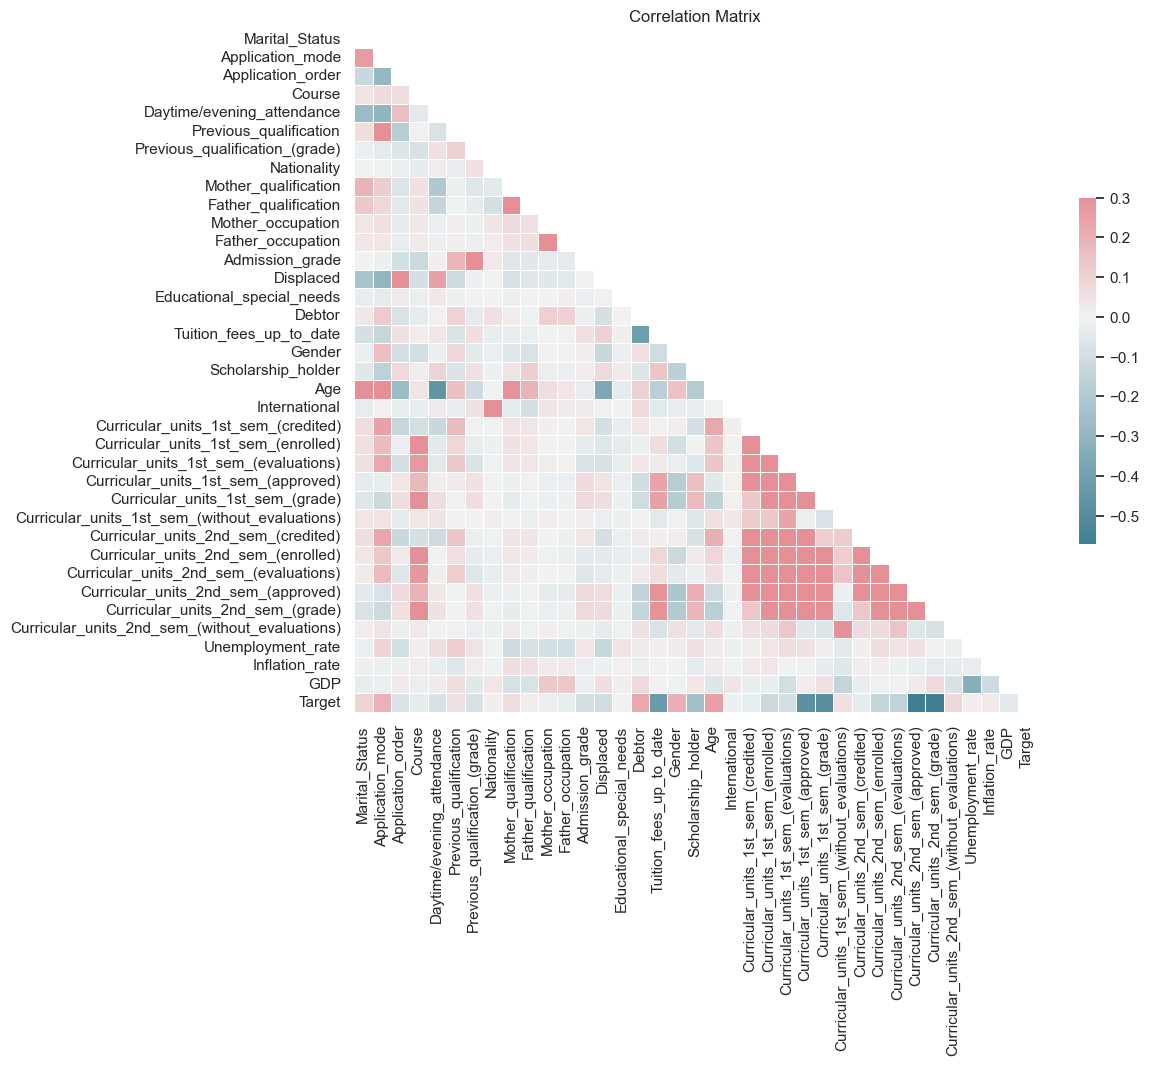

In [7]:
# Encode the target variable
df['Target'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the aesthetic style of the plots
sns.set(style="white")

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

plt.title('Correlation Matrix')
plt.show()

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Calculate the correlations with the target variable
correlations = correlation_matrix['Target'].drop('Target').sort_values(ascending=False)

# Print the five highest correlations with the target variable
print("Five highest correlations with target:")
print(correlations.head(5))

# Print the five lowest correlations with the target variable
print("\nFive lowest correlations with target:")
print(correlations.tail(5))

Five highest correlations with target:
Age                 0.254215
Debtor              0.229407
Gender              0.203983
Application_mode    0.198458
Marital_Status      0.093712
Name: Target, dtype: float64

Five lowest correlations with target:
Tuition_fees_up_to_date               -0.429149
Curricular_units_1st_sem_(approved)   -0.479112
Curricular_units_1st_sem_(grade)      -0.480669
Curricular_units_2nd_sem_(approved)   -0.569500
Curricular_units_2nd_sem_(grade)      -0.571792
Name: Target, dtype: float64


In [9]:
# Get dummies for the categorical features
df_with_dummies = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Calculate the correlation matrix using df_with_dummies
correlation_matrix_dummies = df_with_dummies.corr()

# Calculate the correlations with the target variable
correlations_dummies = correlation_matrix_dummies['Target'].drop('Target').sort_values(ascending=False)

# Print the five highest correlations with the target variable
print("Five highest correlations with target (using dummies):")
print(correlations_dummies.head(15))

# Print the five lowest correlations with the target variable
print("\nFive lowest correlations with target (using dummies):")
print(correlations_dummies.tail(15))


Five highest correlations with target (using dummies):
Age                          0.254215
Application_mode_39          0.231699
Debtor_1                     0.229407
Gender_1                     0.203983
Mother_qualification_34      0.155484
Father_qualification_34      0.138755
Previous_qualification_19    0.133933
Application_mode_7           0.111978
Mother_occupation_90         0.110620
Course_9991                  0.101295
Father_occupation_90         0.101075
Previous_qualification_3     0.100485
Marital_Status_2             0.099048
Course_9119                  0.094175
Course_9130                  0.090145
Name: Target, dtype: float64

Five lowest correlations with target (using dummies):
Daytime/evening_attendance_1             -0.080499
Course_9238                              -0.087361
Curricular_units_1st_sem_(evaluations)   -0.090125
Admission_grade                          -0.095806
Displaced_1                              -0.107232
Curricular_units_1st_sem_(enrolled) 

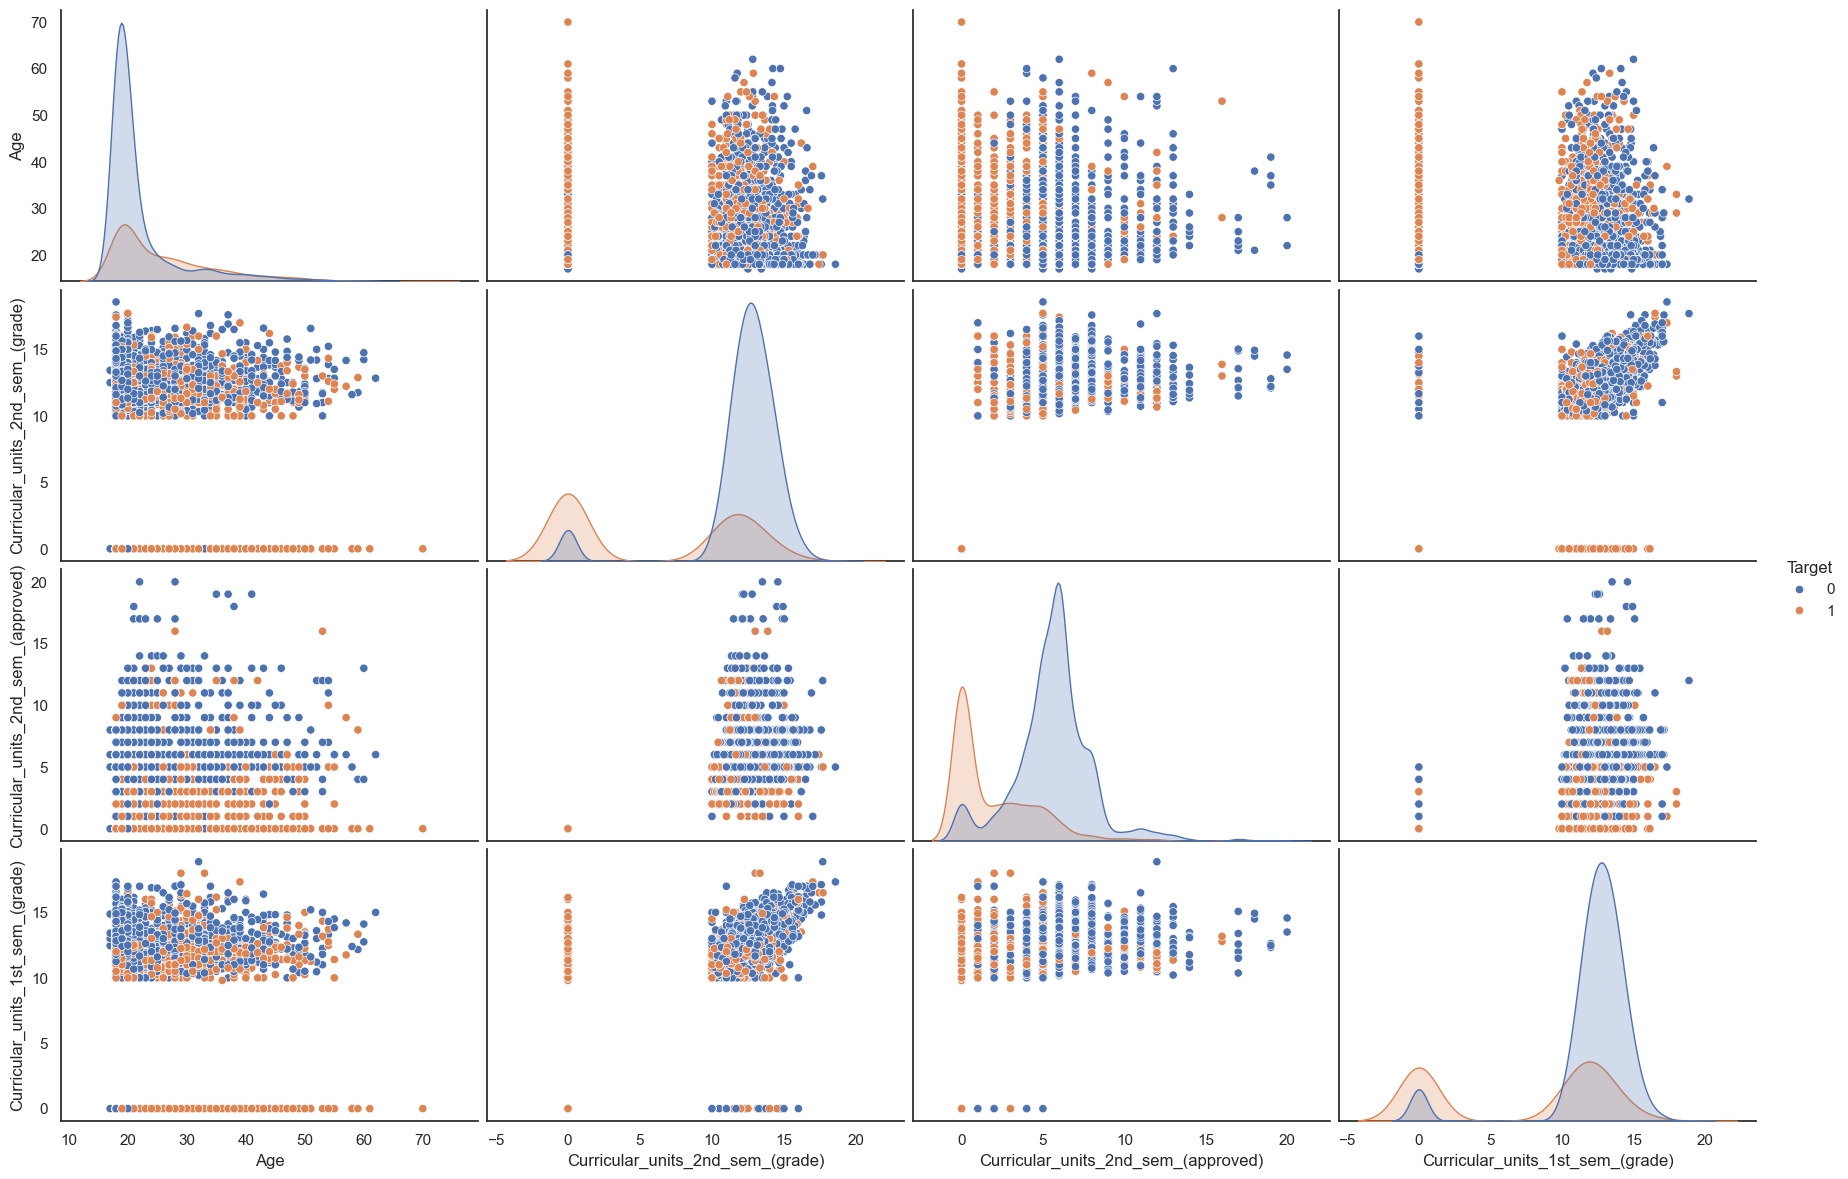

In [10]:
# Select the features for the pairplot
selected_features_for_pairplot = ['Age', 'Debtor', 'Gender', 'Curricular_units_2nd_sem_(grade)', 'Curricular_units_2nd_sem_(approved)', 'Curricular_units_1st_sem_(grade)', 'Target']

# Create a pairplot with larger figure size
sns.pairplot(df[selected_features_for_pairplot], hue='Target', height=3, aspect=1.5)
plt.show()

In [11]:
# Count the number of variables with a correlation higher than 0.1
high_correlation_count = (correlations_dummies.abs() > 0.1).sum()
print(f"Number of variables with a correlation higher than 0.1: {high_correlation_count}")



Number of variables with a correlation higher than 0.1: 23


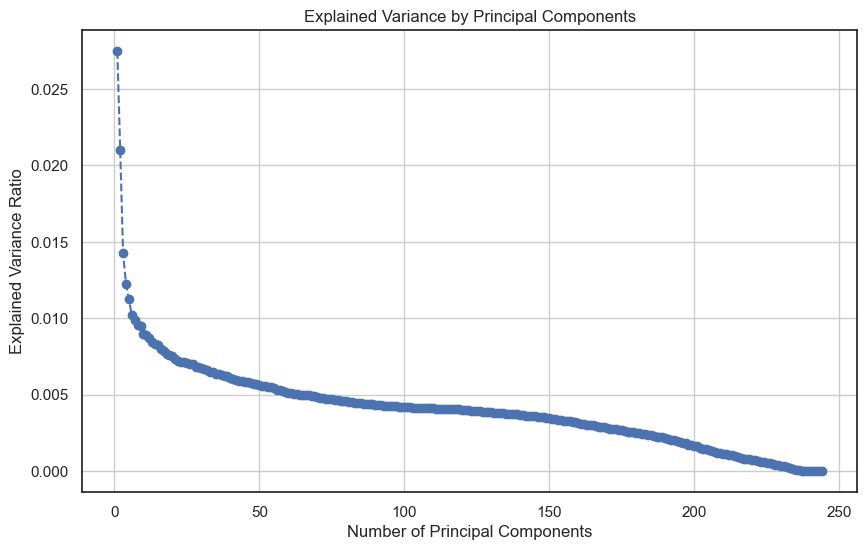

In [12]:
# Standardize the data before applying PCA

# Separate features and target
X_dummies = df_with_dummies.drop(columns=['Target'])
y_dummies = df_with_dummies['Target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dummies)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [13]:
# Calculate the eigenvalues from the explained variance
eigenvalues = pca.explained_variance_

# Apply the Kaiser Criterion
kaiser_criterion = eigenvalues > 1

# Count the number of components that meet the criterion
num_components_kaiser = np.sum(kaiser_criterion)

print(f"Number of components to retain according to the Kaiser Criterion: {num_components_kaiser}")

Number of components to retain according to the Kaiser Criterion: 110


In [14]:
# Transform the data using the first 110 principal components
X_pca = pca.transform(X_scaled)[:, :110]

# Create a new DataFrame with the PCA components
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(110)])

# Display the new DataFrame
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110
0,-6.283222,-1.535752,-0.315547,0.684295,-0.038247,0.297288,0.253482,0.781502,-0.890616,1.190989,...,-0.235192,-1.054530,-0.152194,-0.624267,0.311583,-0.529823,-0.800248,0.074818,0.196077,-0.276364
1,-0.229666,-1.212774,3.754628,-0.197720,4.547440,-1.568669,-0.961428,-0.724723,-0.045845,-0.774444,...,0.127509,-0.254129,-0.559737,0.074495,-0.520447,-0.058973,0.225821,0.077779,0.091229,-0.041063
2,-3.681283,0.710772,-1.400622,-0.276760,0.439744,-0.346036,0.262830,1.431337,-0.455023,0.770966,...,0.730970,-0.756588,-0.155235,-0.157588,0.074576,-0.166484,0.058534,0.344679,0.181695,-0.009712
3,0.075853,-2.334844,-1.659118,0.923570,-0.064083,-0.770897,-0.157654,-0.022936,-0.184080,-0.439135,...,-0.187072,-0.350077,0.455479,0.164869,0.033801,0.113089,-0.348787,0.152463,0.001313,-0.070188
4,0.479611,4.552416,-2.535292,-1.514201,0.323787,-0.942415,0.394697,-1.973511,-0.877266,0.012854,...,-0.674332,0.379647,-0.457044,-0.314269,0.293459,0.266962,-0.312007,0.210772,0.117036,-0.251590


In [15]:
from scipy.stats import pearsonr

# Calculate the p-values for the correlations with the target variable
p_values = df_with_dummies.apply(lambda x: pearsonr(x, df_with_dummies['Target'])[1])

# Select columns with p-value less than 0.05, excluding the Target variable
selected_columns = p_values[p_values < 0.10].index.drop('Target')

# Create a new DataFrame with the selected columns
df_selected = df_with_dummies[selected_columns]

# Display the new DataFrame
df_selected.head()


,Previous_qualification_(grade),Admission_grade,Age,Curricular_units_1st_sem_(credited),Curricular_units_1st_sem_(enrolled),Curricular_units_1st_sem_(evaluations),Curricular_units_1st_sem_(approved),Curricular_units_1st_sem_(grade),Curricular_units_1st_sem_(without_evaluations),Curricular_units_2nd_sem_(credited),...,Father_occupation_90,Father_occupation_99,Father_occupation_144,Father_occupation_171,Father_occupation_192,Displaced_1,Debtor_1,Tuition_fees_up_to_date_1,Gender_1,Scholarship_holder_1
0,122.0,127.3,20,0,0,0,0,0.000000,0,0,...,False,False,False,False,False,True,False,True,True,False
1,160.0,142.5,19,0,6,6,6,14.000000,0,0,...,False,False,False,False,False,True,False,False,True,False
2,122.0,124.8,19,0,6,0,0,0.000000,0,0,...,False,False,False,False,False,True,False,False,True,False
3,122.0,119.6,20,0,6,8,6,13.428571,0,0,...,False,False,False,False,False,True,False,True,False,False
4,100.0,141.5,45,0,6,9,5,12.333333,0,0,...,False,False,False,False,False,False,False,True,False,False


___
# Task 5 – Baselines and Learning Curves
Use a simple cross validation to evaluate baselines and to draw learning curves.

• Setup a simple cross validation for evaluating algorithms. Use the quality measures from
Task 1.

• Determine an appropriate simple baseline (no trained model) for your task.

• Select twoML algorithms 𝐴1 and 𝐴2 from the lectures (or their regression counterparts) and
use their implementations in scikit-learn.

• Briefly discuss relevant dataset transformations that have to be used with each of the algorithms.
Apply them in the all tasks where necessary!

• For each algorithm (𝐴1 and 𝐴2) select exactly two hyperparameters. These will be the
hyperparameters you optimize. Leave the others at default settings.

• In the simple cross validation, evaluate the baselines and build learning curves (separately for
𝐴1 and 𝐴2) with the respective two chosen hyperparameters.

• Create one visualization for each algorithm, showing the performance in different hyper-
parametrizations and comparing it to the baseline.

• Interpret the results
___

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score
import numpy as np
import time
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

## Evaluation Function:

We set up a simple evaluation function that takes in the type of model, the features, the targets and the number of outer folds. the function then returns the earlier discussed Accuracy metrics: F1 Score and Accuracy

In [17]:
def evaluate_model(model, X, y, cv=2):
    # Define the scoring metric for accuracy
    scoring_accuracy = make_scorer(accuracy_score)
    
    # Perform cross-validation for accuracy
    scores_accuracy = cross_val_score(model, X, y, cv=cv, scoring=scoring_accuracy)
    
    # Print the accuracy scores
    print(f"Accuracy scores for each fold: {scores_accuracy}")
    print(f"Mean accuracy: {scores_accuracy.mean()}")
    
    scoring_f1 = make_scorer(f1_score, pos_label=1)
    scores_f1 = cross_val_score(model, X, y, cv=cv, scoring=scoring_f1)

    # Print the F1 scores for class 1
    print(f"F1 scores for class 1 for each fold: {scores_f1}")
    print(f"Mean F1 score for class 1: {scores_f1.mean()}")

In [28]:
def evaluate_model(model, X, y, cv=3):
    # Define scoring metrics
    scoring_accuracy = make_scorer(accuracy_score)
    scoring_f1 = make_scorer(f1_score, pos_label=1)

    # Define StratifiedKFold with 3 splits and shuffle
    skf = RepeatedStratifiedKFold(n_splits=cv, n_repeats=10, random_state=1)
    
    # Perform cross-validation for accuracy and F1 scores
    scores_accuracy = cross_val_score(model, X, y, cv=skf, scoring=scoring_accuracy)
    scores_f1 = cross_val_score(model, X, y, cv=skf, scoring=scoring_f1)
    
    return scores_accuracy, scores_f1


## Baseline Model
For the Baseline model we set up two simple models that predict all dropouts or no dropouts for the entire test set. 

In [19]:
# Baseline model that guesses all dropouts
class AllDropoutsClassifier:
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.ones(X.shape[0])
    
    def get_params(self, deep=False):
        return {}
    
    def set_params(self, **params):
        return self

# Baseline model that guesses all not dropouts
class AllNotDropoutsClassifier:
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros(X.shape[0])
    
    def get_params(self, deep=False):
        return {}
    
    def set_params(self, **params):
        return self

# Evaluate the baseline model that guesses all dropouts
print("Evaluating baseline model that guesses all dropouts:")
scores_accuracy, scores_f1 = evaluate_model(AllDropoutsClassifier(), df_pca, y_dummies)

# Print the accuracy and F1 scores for the baseline model
print(f"Accuracy scores: {scores_accuracy}")
print(f"Mean accuracy: {scores_accuracy.mean()}")
print(f"F1 scores for class 1: {scores_f1}")
print(f"Mean F1 score for class 1: {scores_f1.mean()}")

# Evaluate the baseline model that guesses all not dropouts
print("\nEvaluating baseline model that guesses all not dropouts:")
scores_accuracy, scores_f1 = evaluate_model(AllNotDropoutsClassifier(), df_pca, y_dummies)

# Print the accuracy and F1 scores for the baseline model
print(f"Accuracy scores: {scores_accuracy}")
print(f"Mean accuracy: {scores_accuracy.mean()}")
print(f"F1 scores for class 1: {scores_f1}")
print(f"Mean F1 score for class 1: {scores_f1.mean()}")


Evaluating baseline model that guesses all dropouts:
Accuracy scores: [0.32135593 0.32135593 0.32089552 0.32135593 0.32135593 0.32089552
 0.32135593 0.32135593 0.32089552 0.32135593 0.32135593 0.32089552
 0.32135593 0.32135593 0.32089552 0.32135593 0.32135593 0.32089552
 0.32135593 0.32135593 0.32089552 0.32135593 0.32135593 0.32089552
 0.32135593 0.32135593 0.32089552 0.32135593 0.32135593 0.32089552]
Mean accuracy: 0.3212024622649466
F1 scores for class 1: [0.48640328 0.48640328 0.48587571 0.48640328 0.48640328 0.48587571
 0.48640328 0.48640328 0.48587571 0.48640328 0.48640328 0.48587571
 0.48640328 0.48640328 0.48587571 0.48640328 0.48640328 0.48587571
 0.48640328 0.48640328 0.48587571 0.48640328 0.48640328 0.48587571
 0.48640328 0.48640328 0.48587571 0.48640328 0.48640328 0.48587571]
Mean F1 score for class 1: 0.48622742456172907

Evaluating baseline model that guesses all not dropouts:
Accuracy scores: [0.67864407 0.67864407 0.67910448 0.67864407 0.67864407 0.67910448
 0.67864407 

## A1: SVM Evaluation 
The first ML algorithm that we are going to evaluate is the Support Vector Machine (SVM) with a polynomial kernel. For this algorithm, it is essential to scale the data before training because features with larger values would otherwise dominate the computation without necessarily being more important. Scaling ensures that all features contribute equally to the model by standardizing their ranges.

The two hyperparameters chosen for the algorithm are:
* Polynomial Degree: Determines the complexity of the transformation of the data into a higher-dimensional space. A higher degree allows the model to capture more intricate patterns, but it may also increase the risk of overfitting.
* C Value: Controls the trade-off between achieving a low error on the training data and minimizing model complexity. A smaller C encourages a simpler decision boundary, while a larger C prioritizes correctly classifying all training examples, potentially at the cost of generalization.



Evaluating SVM with polynomial kernel of degree 1 and C=0.1:
Accuracy scores: [0.86711864 0.86237288 0.84938942 0.87389831 0.85898305 0.8568521
 0.86440678 0.86983051 0.85210312 0.87254237 0.85423729 0.85617368
 0.85762712 0.85966102 0.86024423 0.85288136 0.86440678 0.86431479
 0.86372881 0.85898305 0.86227951 0.86915254 0.85627119 0.85481682
 0.86711864 0.84813559 0.85006784 0.84677966 0.86847458 0.85956581]
Mean accuracy: 0.8600805832164294
F1 scores for class 1: [0.755      0.74969174 0.72524752 0.77536232 0.73195876 0.7359199
 0.74874372 0.76585366 0.72885572 0.76558603 0.73291925 0.7408313
 0.73880597 0.74221669 0.74692875 0.73110285 0.75062344 0.75247525
 0.74906367 0.74257426 0.74782609 0.75905119 0.74821853 0.72911392
 0.75802469 0.74074074 0.71111111 0.72705314 0.7622549  0.73896595]
Mean F1 score for class 1: 0.7444040353965226


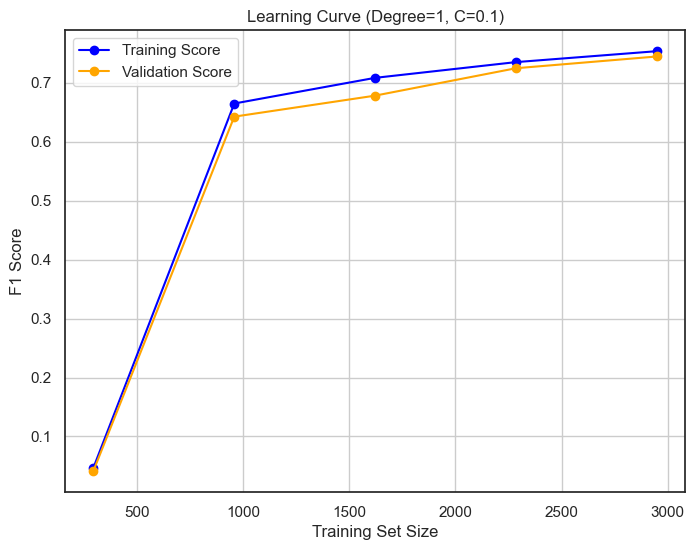



Evaluating SVM with polynomial kernel of degree 1 and C=1:
Accuracy scores: [0.8779661  0.86237288 0.86702849 0.8779661  0.86983051 0.85617368
 0.87457627 0.87389831 0.8568521  0.8779661  0.86711864 0.86499322
 0.86101695 0.86847458 0.87788331 0.87050847 0.86847458 0.86295794
 0.86711864 0.86305085 0.87720488 0.8840678  0.86576271 0.86092266
 0.87728814 0.8779661  0.85549525 0.87322034 0.87254237 0.85888738]
Mean accuracy: 0.8689861785065427
F1 scores for class 1: [0.784689   0.75453446 0.76213592 0.78971963 0.76470588 0.74146341
 0.77737665 0.77697842 0.74173807 0.7826087  0.76385542 0.76167665
 0.75330927 0.76626506 0.7804878  0.76960193 0.76738609 0.75544794
 0.76385542 0.75365854 0.78426698 0.79422383 0.76484561 0.7509113
 0.78426698 0.78723404 0.7340824  0.77817319 0.77830189 0.74509804]
Mean F1 score for class 1: 0.7670966171712154


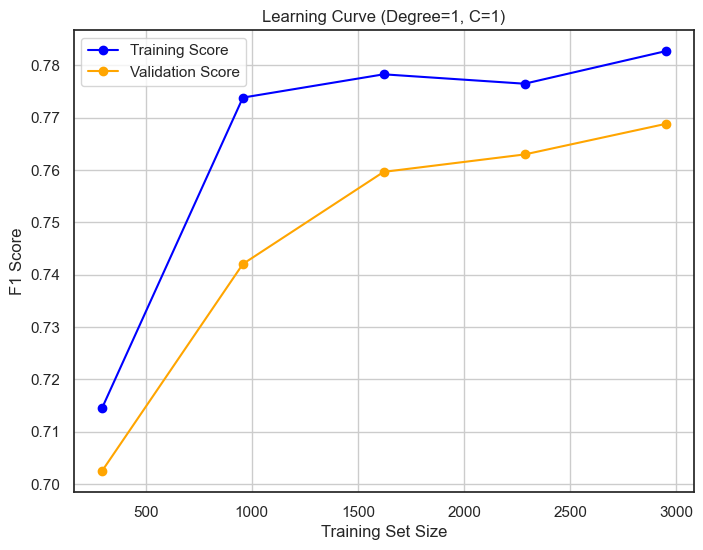



Evaluating SVM with polynomial kernel of degree 1 and C=10:
Accuracy scores: [0.88271186 0.86847458 0.87652646 0.88677966 0.87457627 0.86635007
 0.87864407 0.88338983 0.86770692 0.88338983 0.87457627 0.87449118
 0.86847458 0.87864407 0.88738128 0.87728814 0.87864407 0.87177748
 0.87050847 0.87050847 0.88602442 0.8820339  0.87457627 0.87313433
 0.87661017 0.88338983 0.86024423 0.88135593 0.87728814 0.87313433]
Mean accuracy: 0.8762878366258078
F1 scores for class 1: [0.79907085 0.77283372 0.78333333 0.80826636 0.78106509 0.77172654
 0.79258401 0.80092593 0.76813317 0.8        0.78513357 0.78209658
 0.77283372 0.79064327 0.80378251 0.78928987 0.79258401 0.77738516
 0.77342823 0.77342823 0.80600462 0.79625293 0.78808706 0.77869822
 0.78886311 0.80275229 0.75       0.80225989 0.78977933 0.77711561]
Mean F1 score for class 1: 0.7866119072019299


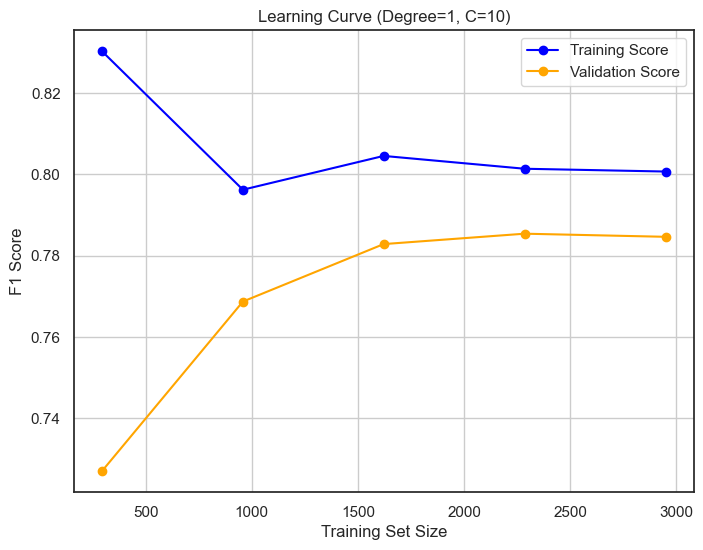



Evaluating SVM with polynomial kernel of degree 1 and C=100:
Accuracy scores: [0.8820339  0.86779661 0.87856174 0.88610169 0.8759322  0.86770692
 0.87728814 0.88271186 0.86567164 0.88271186 0.87186441 0.87516961
 0.86711864 0.87728814 0.88670285 0.87525424 0.87864407 0.8724559
 0.86711864 0.87389831 0.88602442 0.88       0.87661017 0.87177748
 0.87932203 0.8820339  0.86227951 0.8779661  0.87525424 0.8724559 ]
Mean accuracy: 0.8758585040897208
F1 scores for class 1: [0.79861111 0.77246208 0.78715815 0.80821918 0.78495887 0.77456647
 0.79075145 0.80046136 0.76705882 0.80183276 0.78150289 0.78554779
 0.77209302 0.78928987 0.80376028 0.78703704 0.79401611 0.78037383
 0.76832151 0.78117647 0.80733945 0.79442509 0.79223744 0.77946324
 0.79350348 0.80182232 0.755716   0.79775281 0.78801843 0.77725118]
Mean F1 score for class 1: 0.7872242840740711


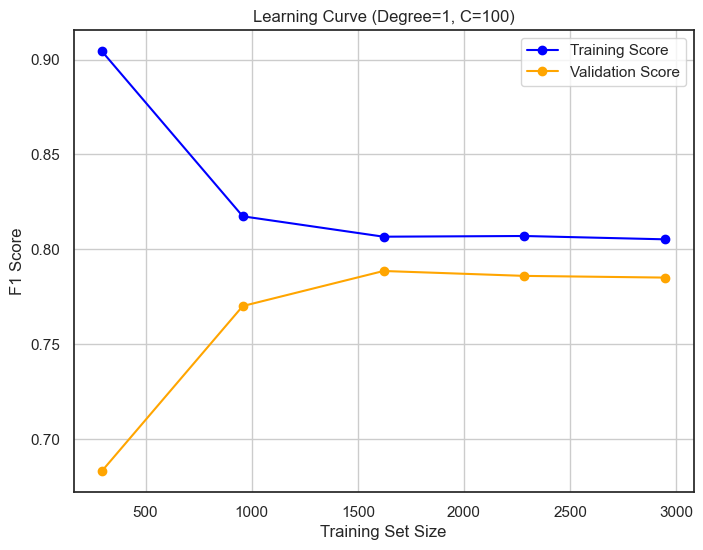



Evaluating SVM with polynomial kernel of degree 2 and C=0.1:
Accuracy scores: [0.73898305 0.74305085 0.75101764 0.75254237 0.73084746 0.74084125
 0.74711864 0.74169492 0.7421981  0.75254237 0.73694915 0.73744912
 0.74237288 0.74101695 0.74151967 0.73966102 0.74847458 0.74016282
 0.73898305 0.74508475 0.75033921 0.74711864 0.74101695 0.74016282
 0.75389831 0.74440678 0.72862958 0.73559322 0.75322034 0.73812754]
Mean accuracy: 0.7428341344126824
F1 scores for class 1: [0.33275563 0.35434412 0.38111298 0.40650407 0.31195841 0.34137931
 0.36672326 0.35966387 0.34707904 0.39669421 0.31205674 0.35175879
 0.3537415  0.33910035 0.33968804 0.33564014 0.37436762 0.34974533
 0.33275563 0.36271186 0.38461538 0.36239316 0.33910035 0.36902801
 0.39398998 0.36209814 0.30313589 0.33219178 0.40716612 0.32986111]
Mean F1 score for class 1: 0.35444536097881074


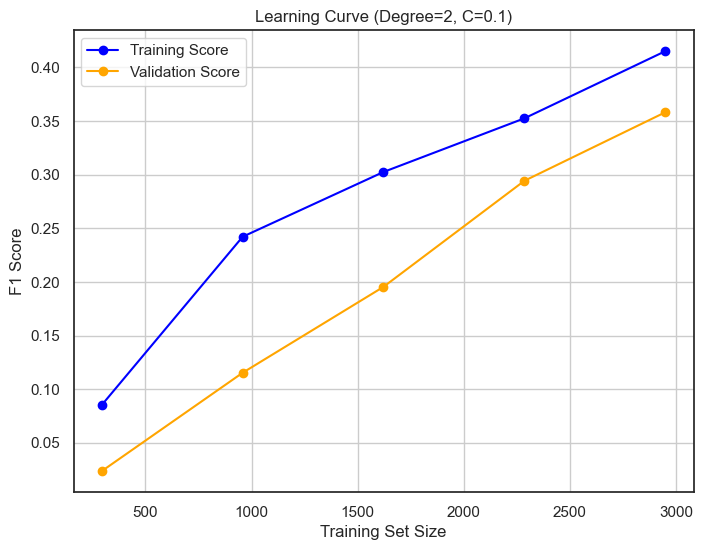



Evaluating SVM with polynomial kernel of degree 2 and C=1:
Accuracy scores: [0.83457627 0.81898305 0.8256445  0.84135593 0.81423729 0.8229308
 0.82440678 0.8359322  0.81614654 0.83728814 0.81355932 0.81139756
 0.82237288 0.83457627 0.8256445  0.82847458 0.81627119 0.81818182
 0.81762712 0.82033898 0.83242877 0.83661017 0.83050847 0.81411126
 0.82779661 0.82169492 0.81953867 0.82169492 0.83389831 0.80800543]
Mean accuracy: 0.8242077746858926
F1 scores for class 1: [0.67292225 0.64257028 0.65687583 0.70076726 0.62568306 0.64682003
 0.65420561 0.68571429 0.64295125 0.68421053 0.62987887 0.62432432
 0.64784946 0.68393782 0.65410498 0.6710013  0.63624161 0.64075067
 0.63500678 0.65177398 0.67371202 0.67651007 0.67105263 0.62972973
 0.66490765 0.65888457 0.63858696 0.64411367 0.68468468 0.61911171]
Mean F1 score for class 1: 0.6549627960245336


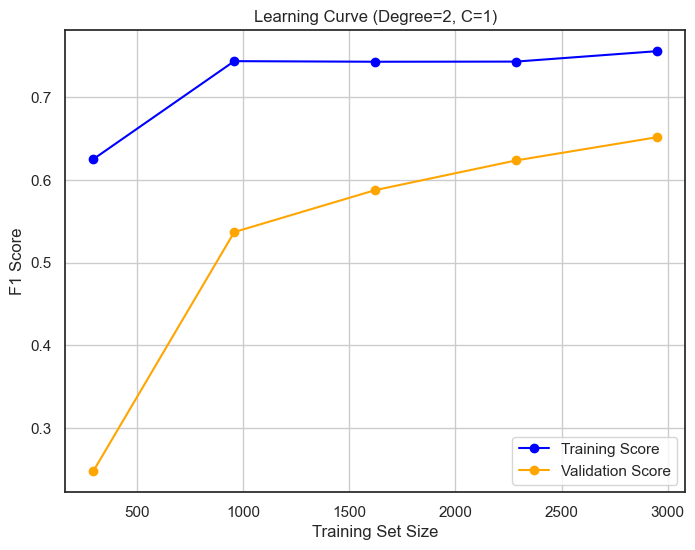



Evaluating SVM with polynomial kernel of degree 2 and C=10:
Accuracy scores: [0.84067797 0.80677966 0.82496608 0.82644068 0.81152542 0.82767978
 0.81830508 0.83322034 0.8202171  0.83457627 0.82237288 0.81953867
 0.83525424 0.81152542 0.83989145 0.83050847 0.80745763 0.83175034
 0.81355932 0.82508475 0.83921303 0.82169492 0.82033898 0.82767978
 0.82440678 0.82915254 0.807327   0.82305085 0.82237288 0.80868385]
Mean accuracy: 0.8235084055837913
F1 scores for class 1: [0.72450176 0.67353952 0.69285714 0.71171171 0.67294118 0.70465116
 0.67788462 0.71981777 0.69150175 0.71294118 0.68957346 0.69212963
 0.7184241  0.67824074 0.72169811 0.71264368 0.66666667 0.70685579
 0.67065868 0.69647059 0.72601156 0.68653159 0.69505178 0.69833729
 0.69778296 0.71034483 0.66109785 0.69473684 0.69745958 0.66348449]
Mean F1 score for class 1: 0.6955516002776727


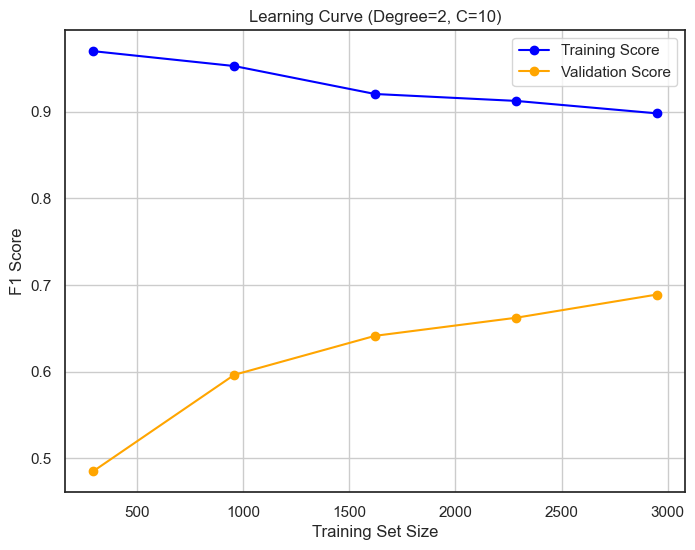



Evaluating SVM with polynomial kernel of degree 2 and C=100:
Accuracy scores: [0.80338983 0.76813559 0.76729986 0.77491525 0.77355932 0.77815468
 0.77762712 0.78576271 0.76255088 0.77355932 0.78983051 0.7761194
 0.77491525 0.75661017 0.77137042 0.77355932 0.77016949 0.77272727
 0.76677966 0.77627119 0.79308005 0.77694915 0.77423729 0.78697422
 0.77355932 0.78305085 0.74898236 0.78101695 0.76745763 0.76322931]
Mean accuracy: 0.7747281466320171
F1 scores for class 1: [0.68546638 0.63146552 0.62015504 0.63991323 0.64008621 0.64105379
 0.64035088 0.65652174 0.63080169 0.63774403 0.66157205 0.64439655
 0.64301075 0.61686233 0.63879957 0.63930886 0.63351351 0.64171123
 0.61607143 0.64668094 0.67518637 0.64122137 0.63764962 0.65570175
 0.64239829 0.65884861 0.58888889 0.64853101 0.6339381  0.60564972]
Mean F1 score for class 1: 0.6397833152739232


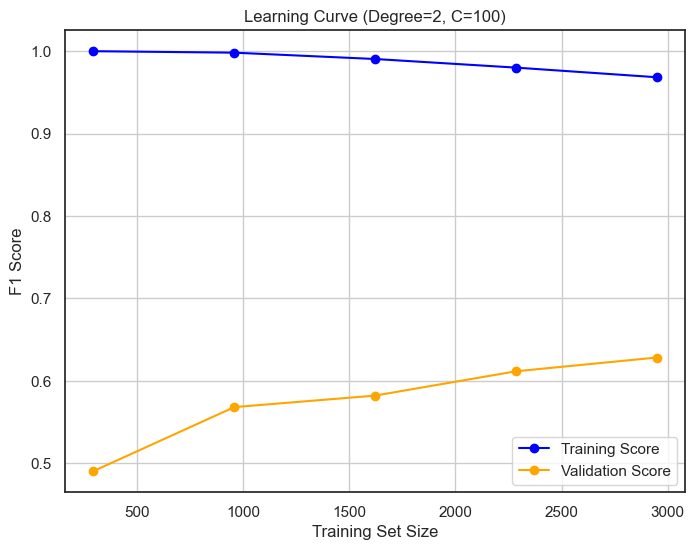



Evaluating SVM with polynomial kernel of degree 3 and C=0.1:
Accuracy scores: [0.72338983 0.73016949 0.73473541 0.73966102 0.71864407 0.72930801
 0.73220339 0.72881356 0.72727273 0.73220339 0.72271186 0.72591588
 0.72881356 0.72067797 0.72727273 0.7179661  0.73288136 0.72862958
 0.72       0.72881356 0.73473541 0.73220339 0.7220339  0.73202171
 0.73288136 0.72542373 0.72320217 0.71864407 0.74101695 0.72048847]
Mean accuracy: 0.7277578210641708
F1 scores for class 1: [0.25       0.29432624 0.31282953 0.34246575 0.25225225 0.27848101
 0.29590018 0.28825623 0.28469751 0.30335097 0.24954128 0.29122807
 0.29078014 0.25090909 0.27436823 0.23247232 0.31358885 0.29577465
 0.24497258 0.28571429 0.30550622 0.29590018 0.26258993 0.30579965
 0.30141844 0.28063943 0.26618705 0.24954792 0.34812287 0.24817518]
Mean F1 score for class 1: 0.2831932012489621


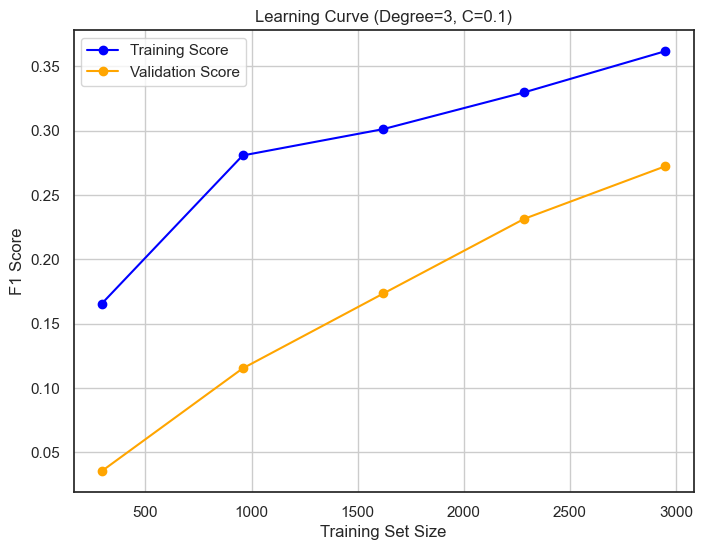



Evaluating SVM with polynomial kernel of degree 3 and C=1:
Accuracy scores: [0.81491525 0.80677966 0.807327   0.83050847 0.80067797 0.80529172
 0.81220339 0.82576271 0.80325645 0.82915254 0.8020339  0.80393487
 0.80677966 0.81694915 0.81614654 0.81423729 0.8020339  0.80868385
 0.8040678  0.81220339 0.81614654 0.82169492 0.81016949 0.81478969
 0.81830508 0.81288136 0.80325645 0.80135593 0.82101695 0.79986431]
Mean accuracy: 0.8114142078513442
F1 scores for class 1: [0.61924686 0.59688826 0.60445682 0.66843501 0.58238636 0.59058488
 0.6115007  0.65223275 0.59269663 0.65384615 0.58404558 0.60027663
 0.6002805  0.62809917 0.61991585 0.61408451 0.59331476 0.60614525
 0.59238364 0.61040788 0.634278   0.63319386 0.61852861 0.6171108
 0.62880886 0.6239782  0.58333333 0.59135286 0.64130435 0.57553957]
Mean F1 score for class 1: 0.6122885552334126


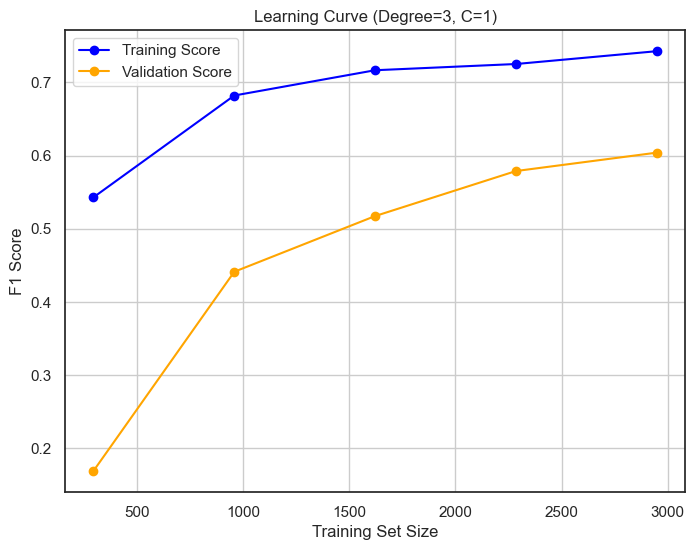



Evaluating SVM with polynomial kernel of degree 3 and C=10:
Accuracy scores: [0.85559322 0.83457627 0.83514247 0.85152542 0.83457627 0.84735414
 0.8420339  0.85016949 0.8412483  0.85627119 0.83932203 0.84056988
 0.8440678  0.84677966 0.84803256 0.85830508 0.84610169 0.83446404
 0.83661017 0.84135593 0.85888738 0.8440678  0.84542373 0.84531886
 0.85084746 0.84813559 0.8385346  0.83322034 0.85288136 0.83242877]
Mean accuracy: 0.8444615136950073
F1 scores for class 1: [0.73992674 0.71021378 0.70687575 0.74385965 0.7060241  0.72527473
 0.71688943 0.74091442 0.71323529 0.74580336 0.70704574 0.72578763
 0.72813239 0.72901679 0.7294686  0.75440658 0.73008323 0.70531401
 0.70210136 0.71601942 0.75644028 0.72619048 0.73426573 0.72262774
 0.73809524 0.73333333 0.70689655 0.71058824 0.74738068 0.69543773]
Mean F1 score for class 1: 0.7249216325531996


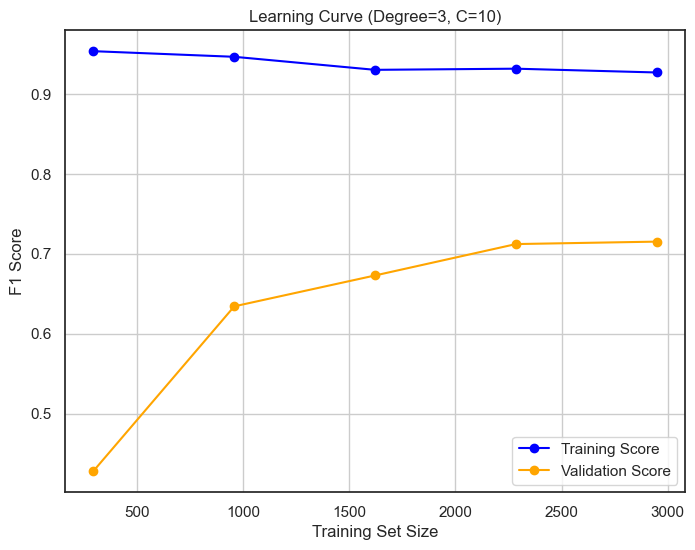



Evaluating SVM with polynomial kernel of degree 3 and C=100:
Accuracy scores: [0.83322034 0.83118644 0.81886024 0.82372881 0.82440678 0.85074627
 0.82508475 0.82847458 0.82903664 0.83932203 0.82779661 0.82971506
 0.82508475 0.82779661 0.83446404 0.83050847 0.82915254 0.83378562
 0.82237288 0.82915254 0.84056988 0.82847458 0.83728814 0.83649932
 0.82644068 0.82779661 0.83175034 0.81898305 0.83864407 0.8229308 ]
Mean accuracy: 0.8301091154397504
F1 scores for class 1: [0.71853547 0.71991001 0.7003367  0.71428571 0.70601589 0.74828375
 0.70681818 0.72167217 0.71034483 0.73519553 0.71460674 0.72203765
 0.70880361 0.71588367 0.7258427  0.72406181 0.71875    0.72190692
 0.69745958 0.71363636 0.73446328 0.71668533 0.73333333 0.72330654
 0.71428571 0.71460674 0.71296296 0.7036626  0.73015873 0.69896194]
Mean F1 score for class 1: 0.7175604822633316


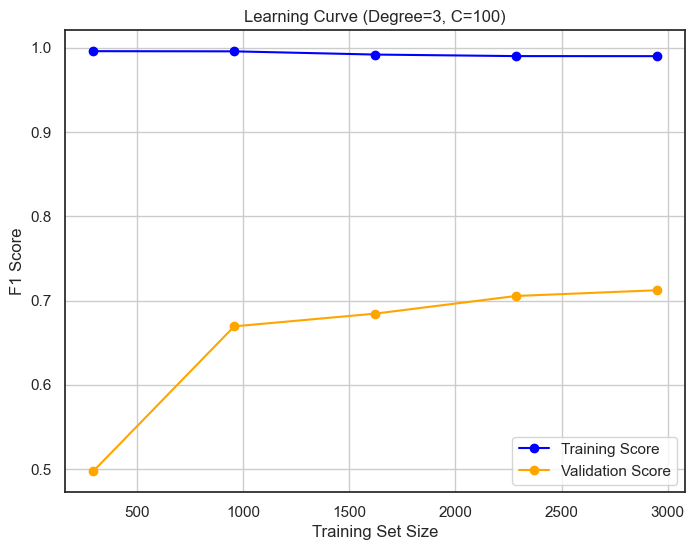



Evaluating SVM with polynomial kernel of degree 4 and C=0.1:
Accuracy scores: [0.70779661 0.7159322  0.71709634 0.72338983 0.71389831 0.71031208
 0.71864407 0.71661017 0.71031208 0.72271186 0.70779661 0.7082768
 0.71322034 0.71050847 0.71777476 0.70711864 0.71661017 0.71641791
 0.70779661 0.71050847 0.71981004 0.71728814 0.71254237 0.71777476
 0.71661017 0.70779661 0.70895522 0.70508475 0.7240678  0.70352782]
Mean accuracy: 0.7135396668429806
F1 scores for class 1: [0.1852552  0.23400366 0.23765996 0.27915194 0.22992701 0.19585687
 0.23853211 0.23443223 0.20186916 0.25771325 0.17904762 0.21245421
 0.22385321 0.20484171 0.23809524 0.17870722 0.24548736 0.23722628
 0.18832392 0.20484171 0.23941068 0.2320442  0.21771218 0.24909747
 0.23722628 0.20917431 0.20111732 0.2047532  0.26666667 0.17077799]
Mean F1 score for class 1: 0.2211753392666136


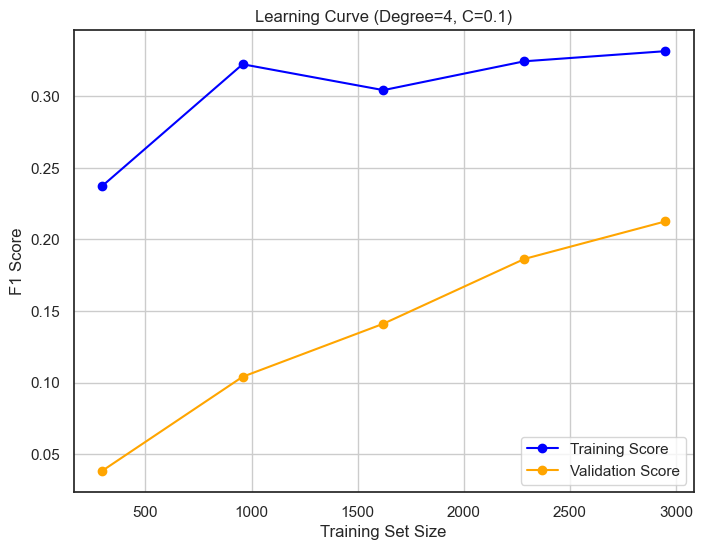



Evaluating SVM with polynomial kernel of degree 4 and C=1:
Accuracy scores: [0.75322034 0.75322034 0.76119403 0.77288136 0.75389831 0.7605156
 0.7640678  0.76677966 0.75033921 0.77016949 0.75254237 0.76255088
 0.76474576 0.76542373 0.75644505 0.76       0.75389831 0.76187246
 0.76       0.75728814 0.76458616 0.76       0.75118644 0.76390773
 0.76271186 0.75050847 0.75033921 0.75322034 0.77762712 0.75373134]
Mean accuracy: 0.7596290504335028
F1 scores for class 1: [0.41100324 0.42405063 0.46504559 0.49472097 0.43192488 0.43879173
 0.45625    0.46417445 0.41772152 0.46948357 0.40842788 0.46969697
 0.45865835 0.459375   0.43642072 0.43630573 0.43014129 0.45916795
 0.44514107 0.43174603 0.46860643 0.44164038 0.42386185 0.45625
 0.45482866 0.425      0.41214058 0.42767296 0.50898204 0.41733547]
Mean F1 score for class 1: 0.44481886437994167


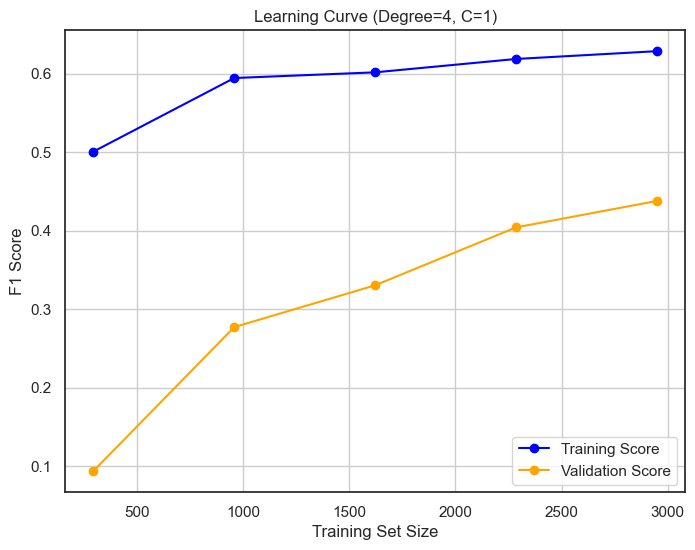



Evaluating SVM with polynomial kernel of degree 4 and C=10:
Accuracy scores: [0.82305085 0.80271186 0.80393487 0.82237288 0.7979661  0.79986431
 0.80881356 0.81084746 0.79850746 0.82169492 0.79728814 0.79579376
 0.80271186 0.81559322 0.81004071 0.81491525 0.80881356 0.80325645
 0.80135593 0.80135593 0.83107191 0.81423729 0.80813559 0.80597015
 0.80271186 0.81423729 0.80189959 0.80610169 0.81152542 0.78629579]
Mean accuracy: 0.8074358561583455
F1 scores for class 1: [0.66059818 0.62835249 0.6232073  0.67493797 0.60582011 0.60508701
 0.63565891 0.64728192 0.61176471 0.65349144 0.60080107 0.61656051
 0.62740077 0.65217391 0.63060686 0.6522293  0.62796834 0.62140992
 0.60671141 0.62095731 0.68757842 0.64136126 0.64131812 0.62565445
 0.62158648 0.64599483 0.61066667 0.62857143 0.64720812 0.57259159]
Mean F1 score for class 1: 0.6308516931425003


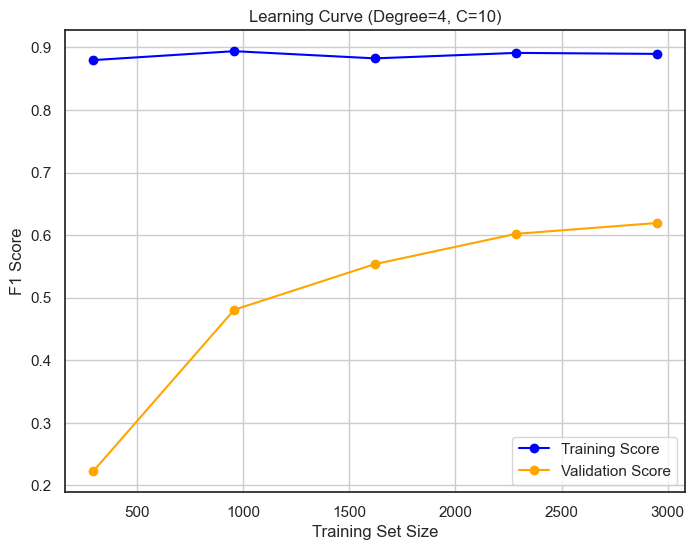



Evaluating SVM with polynomial kernel of degree 4 and C=100:
Accuracy scores: [0.82779661 0.81762712 0.80868385 0.80881356 0.81220339 0.8229308
 0.81491525 0.81966102 0.80529172 0.82305085 0.81762712 0.80800543
 0.81559322 0.82372881 0.81818182 0.81016949 0.81288136 0.81071913
 0.7979661  0.80338983 0.82360923 0.82101695 0.81694915 0.81750339
 0.81491525 0.82169492 0.807327   0.80949153 0.81898305 0.79443691]
Mean accuracy: 0.8141721285713189
F1 scores for class 1: [0.69689737 0.68611435 0.66508314 0.6838565  0.6729634  0.68286756
 0.67844523 0.69703872 0.65954923 0.6918536  0.68090154 0.66822978
 0.67619048 0.6969697  0.68095238 0.67741935 0.67064439 0.67060213
 0.63569682 0.65801887 0.69907407 0.69086651 0.68965517 0.6816568
 0.68218859 0.69524913 0.65281174 0.67134503 0.68844807 0.6362545 ]
Mean F1 score for class 1: 0.6772614722228208


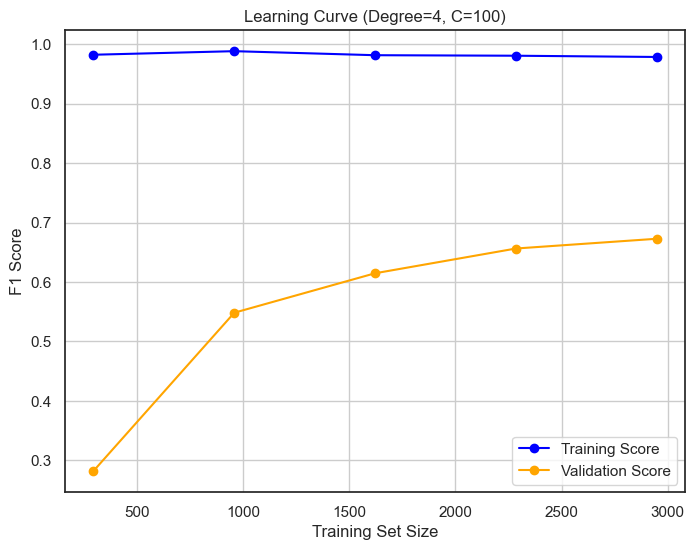



    degree      C  mean_accuracy   mean_f1
0        1    0.1       0.860081  0.744404
1        1    1.0       0.868986  0.767097
2        1   10.0       0.876288  0.786612
3        1  100.0       0.875859  0.787224
4        2    0.1       0.742834  0.354445
5        2    1.0       0.824208  0.654963
6        2   10.0       0.823508  0.695552
7        2  100.0       0.774728  0.639783
8        3    0.1       0.727758  0.283193
9        3    1.0       0.811414  0.612289
10       3   10.0       0.844462  0.724922
11       3  100.0       0.830109  0.717560
12       4    0.1       0.713540  0.221175
13       4    1.0       0.759629  0.444819
14       4   10.0       0.807436  0.630852
15       4  100.0       0.814172  0.677261


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# Define the degrees and C values to evaluate
degrees = [1, 2, 3, 4]
C_values = [0.1, 1, 10, 100]

# Initialize a list to store the results
svm_results = []

# Initialize a list to store the learning curve results
learning_curves = []

# Iterate over the degrees and C values
for degree in degrees:
    for C in C_values:
        # Create the SVM model with the current degree and C value
        svm_model = SVC(kernel='poly', degree=degree, C=C)
        
        # Evaluate the model
        print(f"Evaluating SVM with polynomial kernel of degree {degree} and C={C}:")
        scores_accuracy, scores_f1 = evaluate_model(svm_model, X_scaled, y_dummies)
        
        # Print the accuracy and F1 scores for the current setting
        print(f"Accuracy scores: {scores_accuracy}")
        print(f"Mean accuracy: {scores_accuracy.mean()}")
        print(f"F1 scores for class 1: {scores_f1}")
        print(f"Mean F1 score for class 1: {scores_f1.mean()}")
        
        # Compute learning curves
        train_sizes, train_scores, val_scores = learning_curve(
            svm_model, X_scaled, y_dummies, cv=3, scoring='f1', n_jobs=-1
        )
        
        # Append the learning curve results
        learning_curves.append({
            'degree': degree,
            'C': C,
            'train_sizes': train_sizes,
            'train_scores': train_scores.mean(axis=1),
            'val_scores': val_scores.mean(axis=1)
        })
        
        # Plot the learning curve
        plt.figure(figsize=(8, 6))
        plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score', color='blue')
        plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation Score', color='orange')
        plt.title(f'Learning Curve (Degree={degree}, C={C})')
        plt.xlabel('Training Set Size')
        plt.ylabel('F1 Score')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()
        
        print("\n")
        
        # Append the results to the list
        svm_results.append({
            'degree': degree,
            'C': C,
            'mean_accuracy': scores_accuracy.mean(),
            'mean_f1': scores_f1.mean()
        })

# Convert the results to a DataFrame
svm_results_df = pd.DataFrame(svm_results)

# Display the DataFrame
print(svm_results_df)



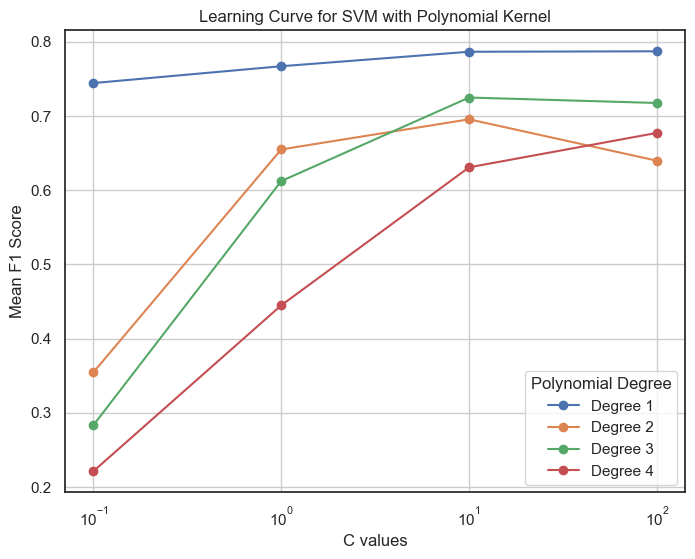

In [21]:
# Plot the F1 score for each degree of the polynomial kernel
plt.figure(figsize=(8, 6))

# Loop through each unique degree
for degree in degrees:
    # Filter results for the current degree
    degree_results = svm_results_df[svm_results_df['degree'] == degree]
    
    # Plot F1 scores for the current degree
    plt.plot(degree_results['C'], degree_results['mean_f1'], marker='o', label=f'Degree {degree}')

# Customize the plot
plt.xlabel('C values')
plt.ylabel('Mean F1 Score')
plt.title('Learning Curve for SVM with Polynomial Kernel')
plt.xscale('log')  # Use logarithmic scale for C values
plt.legend(title='Polynomial Degree')
plt.grid(True)
plt.show()

## Random forrest evaluation:
The second ML algorithm we evaluate is the Random Forest classifier. Random Forests are ensemble methods that build multiple decision trees during training and combine their outputs for prediction, reducing overfitting and improving generalization.

For this algorithm, we tune these two hyperparameters:

* Number of Trees (n_estimators): Determines the number of decision trees in the forest. A larger number of trees generally leads to more stable and robust predictions but increases training time.
* Maximum Tree Depth (max_depth): Controls the depth of each decision tree. Shallower trees limit model complexity, reducing overfitting but potentially underfitting the data. Deeper trees can capture more details in the data but may overfit, especially when combined with small datasets.

Evaluating Random Forest with 10 trees and depth 5:
Accuracy scores: [0.84881356 0.85627119 0.8412483  0.85830508 0.85491525 0.85142469
 0.86305085 0.86033898 0.84735414 0.86372881 0.85220339 0.84871099
 0.85084746 0.85830508 0.85345997 0.84881356 0.85627119 0.84599729
 0.85355932 0.85491525 0.8568521  0.85559322 0.84813559 0.85820896
 0.84745763 0.85016949 0.84328358 0.84813559 0.85016949 0.85210312]
Mean accuracy: 0.8526214382632292
F1 scores for class 1: [0.72771673 0.74271845 0.71942446 0.75266272 0.72979798 0.74325909
 0.75603865 0.75707547 0.72793229 0.75154512 0.74170616 0.72570726
 0.73871734 0.74418605 0.73786408 0.72570726 0.75058824 0.72417983
 0.73464373 0.7452381  0.74970344 0.74244256 0.73396675 0.74909964
 0.71980075 0.74391657 0.70193548 0.74013921 0.72131148 0.72051282]
Mean F1 score for class 1: 0.7366512558522817


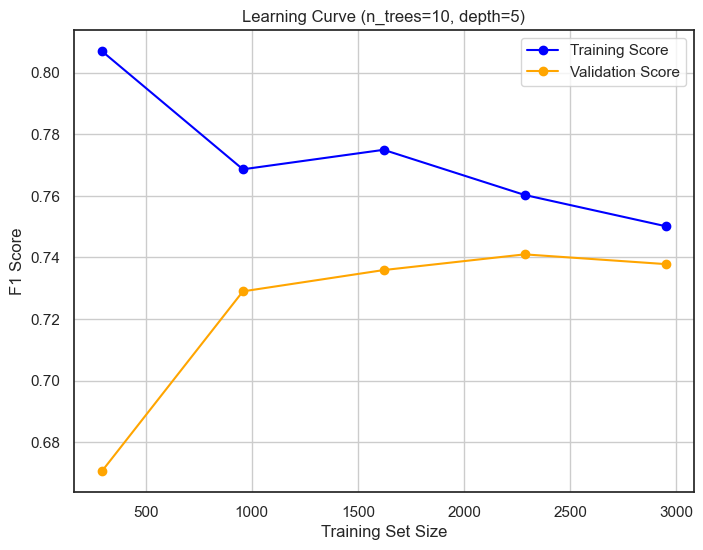



Evaluating Random Forest with 10 trees and depth 10:
Accuracy scores: [0.86508475 0.86508475 0.85617368 0.87186441 0.86305085 0.85278155
 0.86169492 0.86847458 0.85345997 0.87457627 0.85423729 0.86295794
 0.86847458 0.86915254 0.86906377 0.85355932 0.87322034 0.86227951
 0.85491525 0.86644068 0.86838535 0.8759322  0.86305085 0.85753053
 0.86779661 0.87254237 0.86092266 0.86305085 0.86101695 0.85888738]
Mean accuracy: 0.8638554224256224
F1 scores for class 1: [0.76779463 0.7720504  0.75058824 0.77790834 0.75365854 0.74679113
 0.7627907  0.77122642 0.74468085 0.78362573 0.74002418 0.7629108
 0.77230047 0.77532014 0.77320799 0.74766355 0.78331402 0.755716
 0.74463007 0.77012835 0.77283372 0.78343195 0.76674365 0.75177305
 0.77085781 0.78828829 0.75449102 0.77404922 0.76079347 0.75238095]
Mean F1 score for class 1: 0.7643991230203538


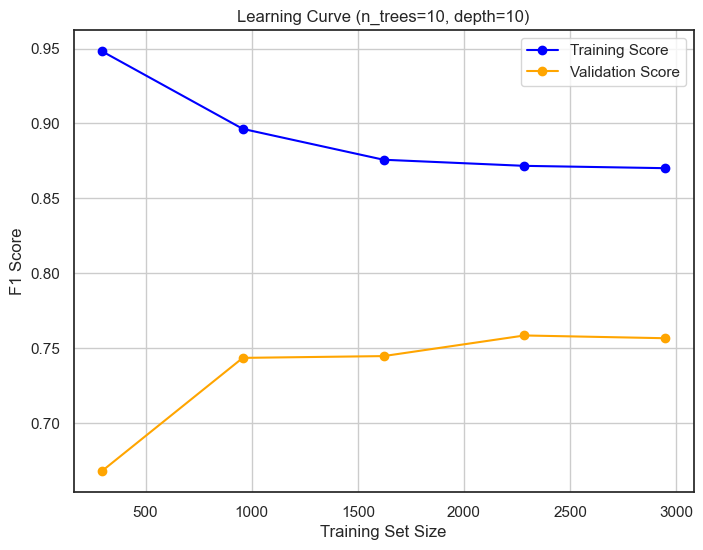



Evaluating Random Forest with 10 trees and depth 15:
Accuracy scores: [0.85966102 0.85288136 0.86770692 0.86847458 0.85762712 0.85956581
 0.86372881 0.86372881 0.85549525 0.86440678 0.84677966 0.86635007
 0.86033898 0.86711864 0.87109905 0.85966102 0.86305085 0.85753053
 0.85966102 0.86847458 0.87516961 0.86508475 0.86440678 0.86567164
 0.85830508 0.86372881 0.85956581 0.85762712 0.86033898 0.86160109]
Mean accuracy: 0.862161350412805
F1 scores for class 1: [0.76013905 0.74738068 0.7761194  0.77904328 0.7597254  0.76013905
 0.76436108 0.76655052 0.75375723 0.76744186 0.73963134 0.77382319
 0.76376147 0.77676538 0.7826087  0.76234214 0.76834862 0.75581395
 0.75902212 0.7764977  0.7904328  0.76779463 0.77272727 0.7718894
 0.75893887 0.77339346 0.75502959 0.76244344 0.76212471 0.75771971]
Mean F1 score for class 1: 0.7655255343398948


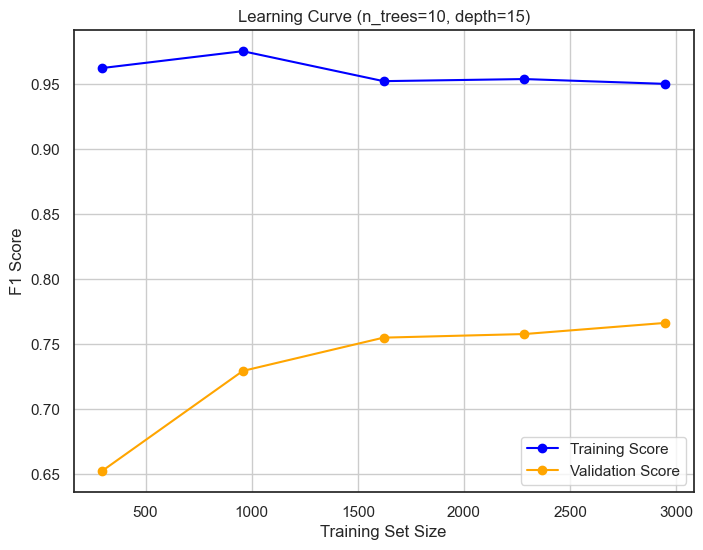



Evaluating Random Forest with 10 trees and depth 20:
Accuracy scores: [0.86305085 0.86847458 0.8724559  0.86983051 0.85762712 0.86024423
 0.85762712 0.86305085 0.85753053 0.86779661 0.84949153 0.85278155
 0.86033898 0.85830508 0.86838535 0.86033898 0.86305085 0.86227951
 0.85491525 0.86440678 0.86431479 0.86372881 0.85830508 0.85617368
 0.86983051 0.87254237 0.86160109 0.86101695 0.86779661 0.86160109]
Mean accuracy: 0.8622964376882919
F1 scores for class 1: [0.76346604 0.7744186  0.77830189 0.77726218 0.75059382 0.76157407
 0.75177305 0.76834862 0.75235849 0.77085781 0.74125874 0.74855156
 0.76102088 0.75555556 0.77598152 0.75764706 0.76566125 0.76531792
 0.74704492 0.76303318 0.77272727 0.75985663 0.76330691 0.74881517
 0.77726218 0.78781038 0.75539568 0.76571429 0.77085781 0.75829384]
Mean F1 score for class 1: 0.7630022448838607


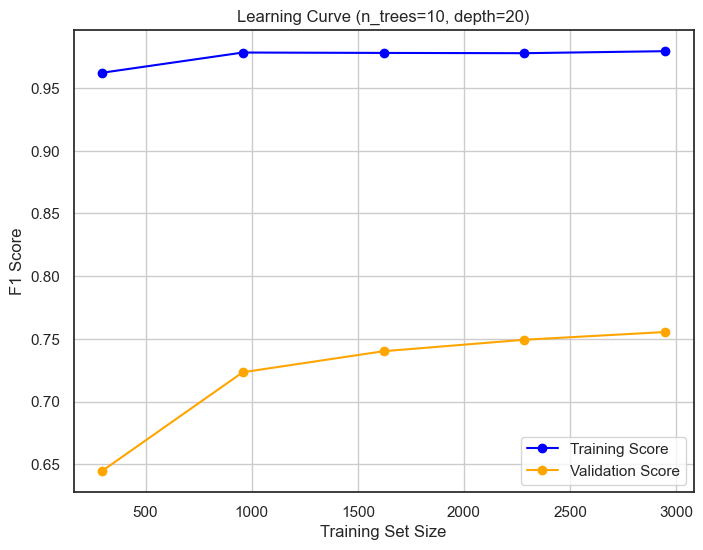



Evaluating Random Forest with 50 trees and depth 5:
Accuracy scores: [0.87118644 0.85288136 0.84599729 0.85559322 0.85627119 0.84871099
 0.85423729 0.86508475 0.84871099 0.86237288 0.85016949 0.85278155
 0.85491525 0.85559322 0.84803256 0.85423729 0.85966102 0.84464043
 0.85355932 0.85288136 0.85753053 0.85966102 0.84813559 0.85888738
 0.86101695 0.84542373 0.85074627 0.84677966 0.85830508 0.85074627]
Mean accuracy: 0.8541583454070174
F1 scores for class 1: [0.77218225 0.74074074 0.72484848 0.74551971 0.73366834 0.73483948
 0.74127557 0.76615746 0.73229292 0.75092025 0.73405535 0.73823884
 0.74216867 0.74056029 0.72616137 0.7467609  0.75618375 0.72039072
 0.73067332 0.73043478 0.74940334 0.74848117 0.7370892  0.74757282
 0.7509113  0.73611111 0.72568579 0.735363   0.7454324  0.72772277]
Mean F1 score for class 1: 0.7403948697526329


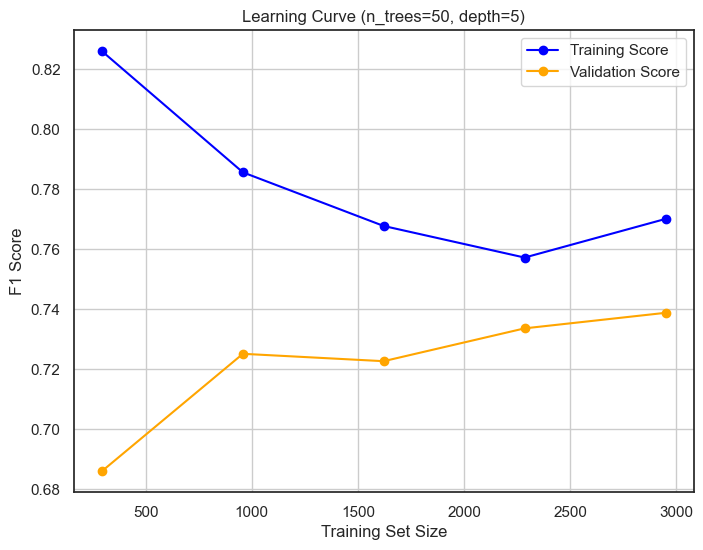



Evaluating Random Forest with 50 trees and depth 10:
Accuracy scores: [0.87728814 0.87525424 0.86838535 0.87322034 0.87186441 0.86635007
 0.8759322  0.87525424 0.86092266 0.88338983 0.86169492 0.87584803
 0.86915254 0.87322034 0.87449118 0.86779661 0.86711864 0.86567164
 0.86372881 0.86711864 0.87109905 0.87661017 0.87118644 0.87177748
 0.88067797 0.87186441 0.86499322 0.86983051 0.87050847 0.8697422 ]
Mean accuracy: 0.8710664244264041
F1 scores for class 1: [0.78780774 0.78403756 0.7695962  0.78077374 0.77201448 0.77119628
 0.78745645 0.78250591 0.75682088 0.7947494  0.75714286 0.78546307
 0.77320799 0.77817319 0.78362573 0.77246208 0.77102804 0.76315789
 0.76042908 0.76941176 0.78060046 0.78333333 0.7816092  0.77633136
 0.79487179 0.784      0.75995175 0.78032037 0.7739645  0.76923077]
Mean F1 score for class 1: 0.7761757952196892


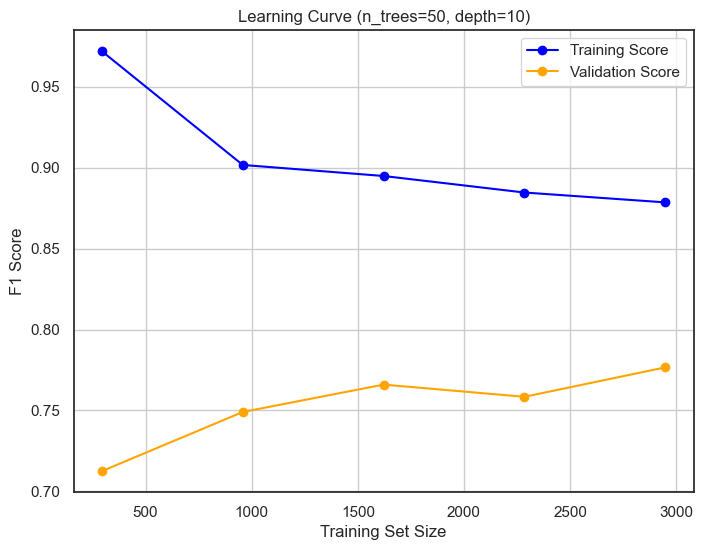



Evaluating Random Forest with 50 trees and depth 15:
Accuracy scores: [0.87254237 0.86847458 0.87042062 0.8759322  0.87118644 0.86499322
 0.87050847 0.87254237 0.85956581 0.8759322  0.86237288 0.87177748
 0.87186441 0.86847458 0.88195387 0.86779661 0.8759322  0.86770692
 0.86440678 0.8779661  0.8724559  0.8759322  0.86915254 0.86770692
 0.8759322  0.87525424 0.87042062 0.86779661 0.86915254 0.87584803]
Mean accuracy: 0.8710667310596478
F1 scores for class 1: [0.78240741 0.7744186  0.77660819 0.78941312 0.77488152 0.7704729
 0.77660819 0.78139535 0.76069364 0.78136201 0.76422764 0.78099652
 0.7804878  0.77336449 0.79814385 0.77508651 0.78745645 0.77192982
 0.76190476 0.79069767 0.78587699 0.78745645 0.77942857 0.77192982
 0.78843931 0.79138322 0.77180406 0.778157   0.77687861 0.78031212]
Mean F1 score for class 1: 0.7788074197438629


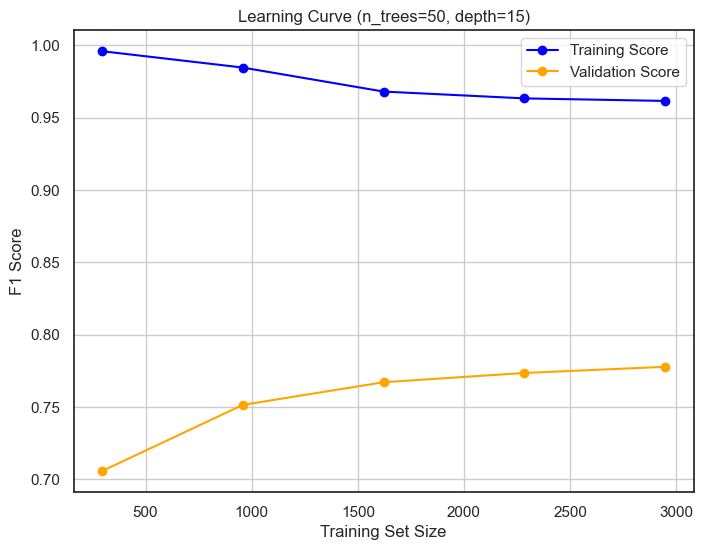



Evaluating Random Forest with 50 trees and depth 20:
Accuracy scores: [0.8759322  0.87118644 0.8724559  0.87728814 0.87254237 0.86770692
 0.87186441 0.87457627 0.86295794 0.87864407 0.86169492 0.87177748
 0.87186441 0.86847458 0.87584803 0.86915254 0.86983051 0.86770692
 0.86983051 0.87186441 0.87042062 0.87186441 0.86779661 0.87313433
 0.87864407 0.86983051 0.86567164 0.86711864 0.87525424 0.87313433]
Mean accuracy: 0.8712022782850003
F1 scores for class 1: [0.78843931 0.78110599 0.78037383 0.79123414 0.77777778 0.7766323
 0.77997672 0.78760046 0.76566125 0.78816568 0.76334107 0.78200692
 0.7804878  0.77283372 0.78696158 0.77739331 0.77622378 0.77139508
 0.77570093 0.7804878  0.78020713 0.7804878  0.778157   0.77922078
 0.79064327 0.78378378 0.76258993 0.77471264 0.78604651 0.77764566]
Mean F1 score for class 1: 0.7792431326138151


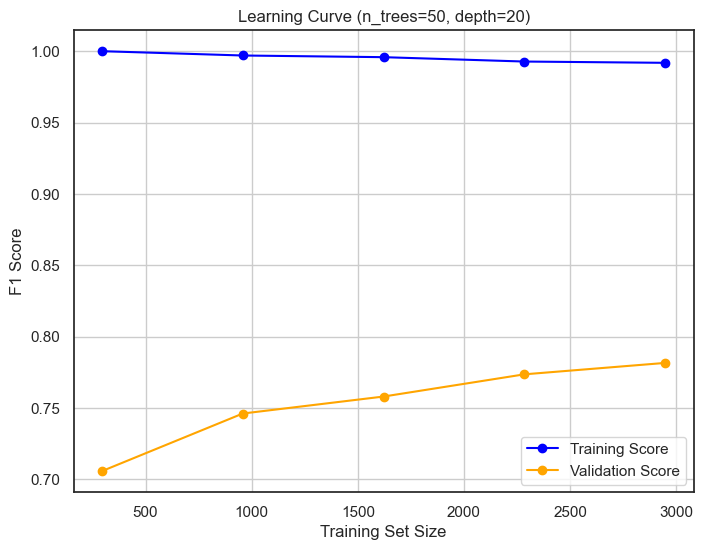



Evaluating Random Forest with 100 trees and depth 5:
Accuracy scores: [0.86440678 0.84949153 0.84803256 0.86033898 0.85898305 0.84531886
 0.85830508 0.86169492 0.85278155 0.86033898 0.84677966 0.85753053
 0.85491525 0.85898305 0.85278155 0.85152542 0.86508475 0.84938942
 0.85559322 0.85694915 0.85617368 0.86237288 0.84610169 0.8568521
 0.86440678 0.84610169 0.84871099 0.84338983 0.86033898 0.84735414]
Mean accuracy: 0.8547009022683194
F1 scores for class 1: [0.75903614 0.73508353 0.7294686  0.75650118 0.74129353 0.72596154
 0.75089392 0.75714286 0.73568819 0.74692875 0.72771084 0.75177305
 0.74029126 0.74757282 0.73823884 0.73835125 0.76224612 0.73188406
 0.73865031 0.74236874 0.74761905 0.75274056 0.73388042 0.74547648
 0.756691   0.73573923 0.72435105 0.72791519 0.75120773 0.71910112]
Mean F1 score for class 1: 0.7417269121829577


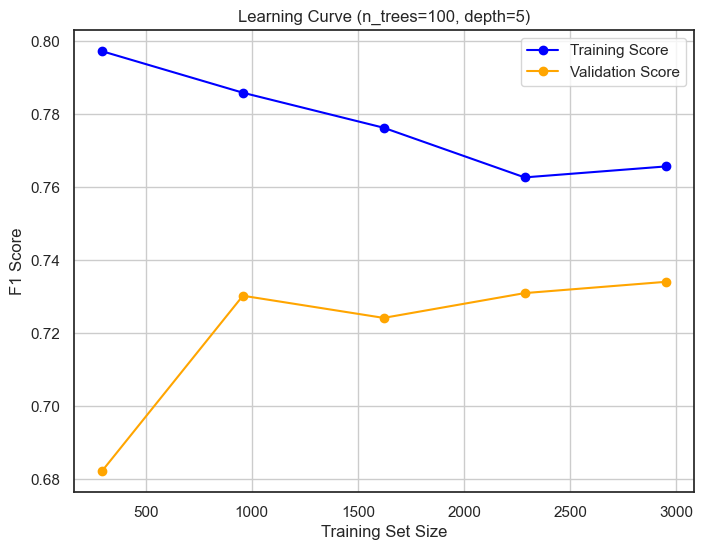



Evaluating Random Forest with 100 trees and depth 10:
Accuracy scores: [0.8820339  0.8779661  0.86838535 0.87322034 0.8759322  0.86431479
 0.8759322  0.87661017 0.86160109 0.88271186 0.86169492 0.87516961
 0.86508475 0.86915254 0.87788331 0.86576271 0.86779661 0.86838535
 0.86372881 0.87728814 0.86906377 0.8779661  0.86644068 0.8697422
 0.88       0.86847458 0.86363636 0.87186441 0.86983051 0.86770692]
Mean accuracy: 0.8711793421183756
F1 scores for class 1: [0.79625293 0.78971963 0.7695962  0.78128655 0.7771011  0.76798144
 0.78696158 0.78384798 0.75656325 0.79380215 0.75886525 0.78403756
 0.76615746 0.76996424 0.78672986 0.76650943 0.77139508 0.76849642
 0.75870348 0.7863046  0.77636153 0.78622328 0.7727797  0.77088305
 0.79249707 0.77752294 0.7575392  0.78200692 0.77358491 0.76477684]
Mean F1 score for class 1: 0.7758150538567592


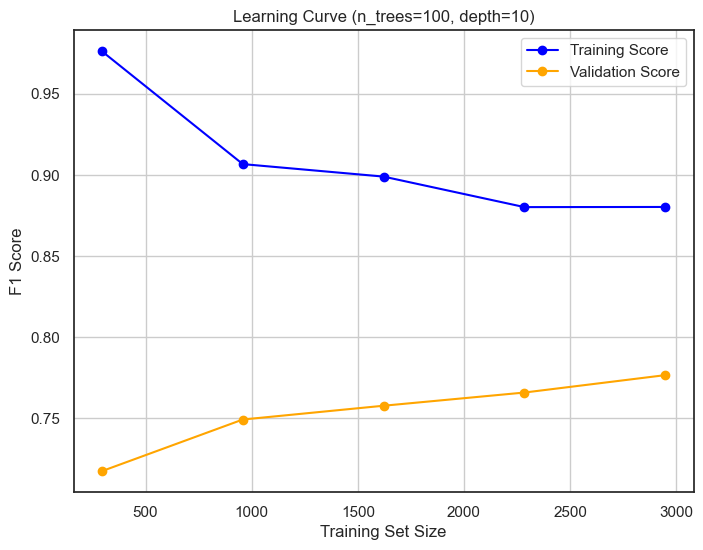



Evaluating Random Forest with 100 trees and depth 15:
Accuracy scores: [0.87864407 0.87118644 0.87313433 0.87457627 0.8759322  0.86160109
 0.87525424 0.87322034 0.86160109 0.88       0.86305085 0.87720488
 0.86847458 0.87322034 0.88195387 0.87457627 0.87389831 0.86363636
 0.86508475 0.8820339  0.87720488 0.88       0.86711864 0.86838535
 0.88067797 0.87254237 0.86635007 0.86779661 0.87864407 0.87177748]
Mean accuracy: 0.8726260530935461
F1 scores for class 1: [0.79161816 0.77803738 0.78179697 0.78513357 0.78343195 0.76388889
 0.78703704 0.78179697 0.7627907  0.78853047 0.76346604 0.78879813
 0.77546296 0.78077374 0.79861111 0.78513357 0.78271028 0.76380729
 0.76337693 0.7972028  0.79455165 0.79298246 0.77471264 0.77283372
 0.79723502 0.78828829 0.7646356  0.7761194  0.79401611 0.77256318]
Mean F1 score for class 1: 0.7810447669434258


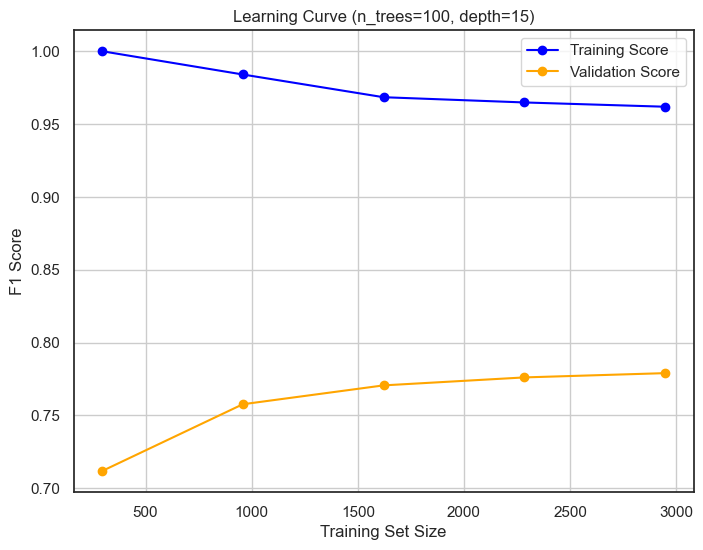



Evaluating Random Forest with 100 trees and depth 20:
Accuracy scores: [0.87932203 0.8820339  0.87584803 0.87864407 0.87389831 0.86567164
 0.87254237 0.87661017 0.86363636 0.8759322  0.86440678 0.87584803
 0.86779661 0.87457627 0.87924016 0.87254237 0.87186441 0.86295794
 0.86983051 0.87932203 0.87652646 0.8759322  0.86779661 0.86906377
 0.88067797 0.87525424 0.86635007 0.86915254 0.8779661  0.8724559 ]
Mean accuracy: 0.8731233355564244
F1 scores for class 1: [0.79445727 0.79907621 0.78646441 0.79448909 0.77751196 0.77241379
 0.78440367 0.78787879 0.76546091 0.78546307 0.76689977 0.78745645
 0.77299185 0.78209658 0.79205607 0.78139535 0.78099652 0.7629108
 0.77358491 0.79254079 0.79271071 0.78596491 0.778157   0.77267373
 0.79582367 0.7918552  0.76407186 0.7819209  0.79357798 0.77882353]
Mean F1 score for class 1: 0.7825375922181461


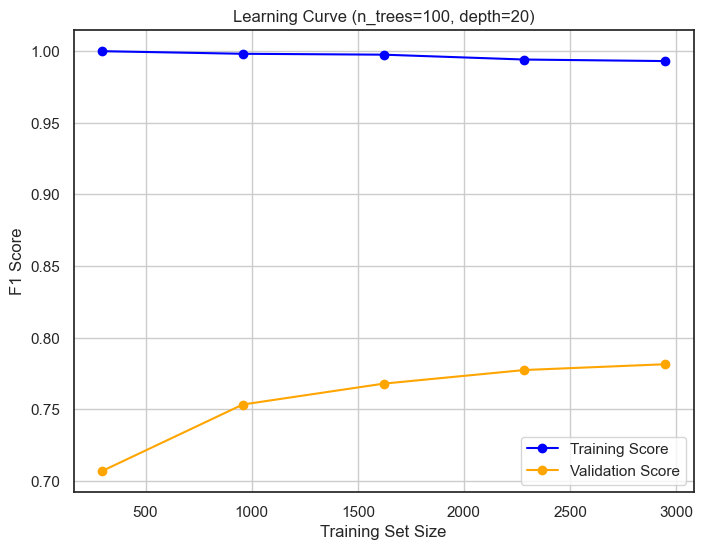



Evaluating Random Forest with 200 trees and depth 5:
Accuracy scores: [0.86779661 0.85016949 0.85006784 0.86508475 0.85491525 0.84803256
 0.85898305 0.86033898 0.85006784 0.86237288 0.84610169 0.85753053
 0.85559322 0.85762712 0.85142469 0.85355932 0.86169492 0.84735414
 0.85694915 0.85830508 0.85142469 0.85830508 0.84745763 0.86092266
 0.86644068 0.84474576 0.84531886 0.8440678  0.86033898 0.85006784]
Mean accuracy: 0.8547686375518402
F1 scores for class 1: [0.76420798 0.73784104 0.73212121 0.76449704 0.73047859 0.73141487
 0.74879227 0.75534442 0.73081608 0.75092025 0.72617612 0.75352113
 0.74181818 0.74698795 0.73709484 0.74285714 0.75539568 0.72727273
 0.74110429 0.74788902 0.73835125 0.74418605 0.73745624 0.7509113
 0.76236429 0.7340302  0.71428571 0.72877358 0.75       0.72682324]
Mean F1 score for class 1: 0.7417910902001666


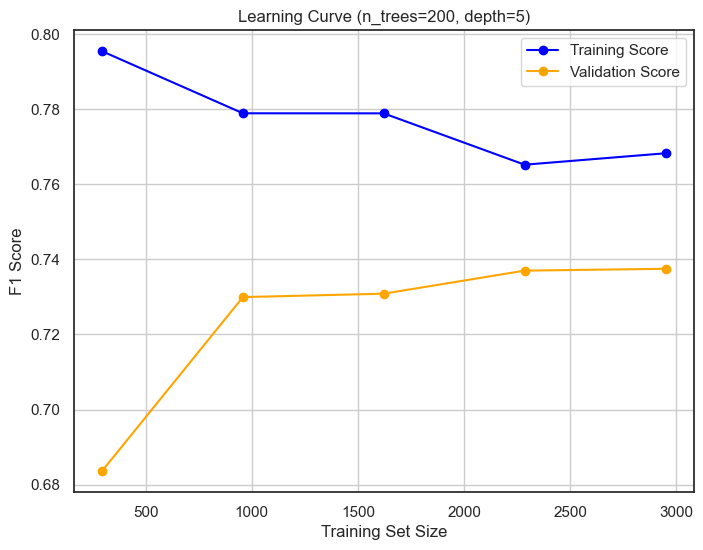



Evaluating Random Forest with 200 trees and depth 10:
Accuracy scores: [0.87254237 0.8779661  0.86702849 0.87389831 0.87661017 0.86363636
 0.87661017 0.87389831 0.86092266 0.88       0.86305085 0.87449118
 0.86983051 0.87050847 0.87856174 0.86711864 0.86711864 0.86635007
 0.85898305 0.8759322  0.86838535 0.8779661  0.86847458 0.86838535
 0.88677966 0.86915254 0.86363636 0.86779661 0.87050847 0.86906377]
Mean accuracy: 0.8708402364142309
F1 scores for class 1: [0.77985948 0.79118329 0.7672209  0.78321678 0.78072289 0.76655052
 0.78688525 0.77804296 0.75624257 0.78700361 0.76179245 0.78362573
 0.77464789 0.77234803 0.78766311 0.76832151 0.77102804 0.76519666
 0.74939759 0.7844523  0.77336449 0.78571429 0.77598152 0.76904762
 0.80558789 0.77942857 0.75577157 0.77508651 0.77502945 0.76941458]
Mean F1 score for class 1: 0.7753276016747658


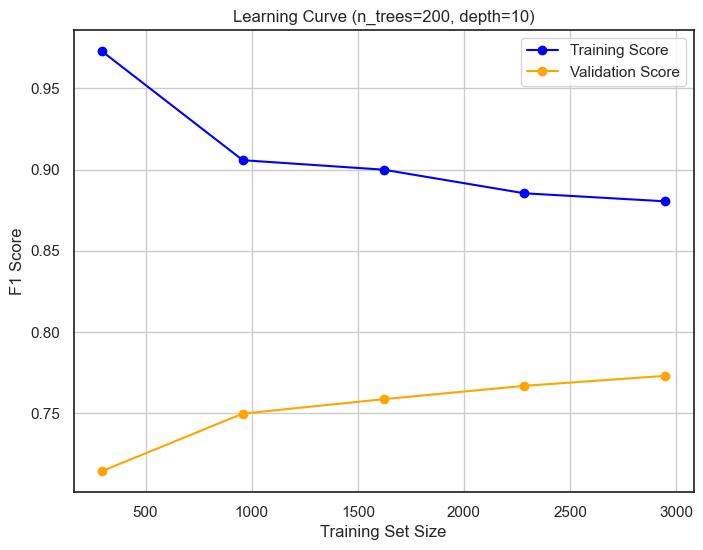



Evaluating Random Forest with 200 trees and depth 15:
Accuracy scores: [0.87525424 0.87322034 0.86906377 0.87389831 0.87457627 0.86295794
 0.8759322  0.8759322  0.86092266 0.88135593 0.86711864 0.87788331
 0.87186441 0.86983051 0.88127544 0.87525424 0.87525424 0.86635007
 0.86644068 0.88       0.87516961 0.88067797 0.86644068 0.87042062
 0.8840678  0.87254237 0.86702849 0.87254237 0.87322034 0.87313433]
Mean accuracy: 0.8729876656777742
F1 scores for class 1: [0.78604651 0.78281069 0.7747958  0.78472222 0.7794994  0.76674365
 0.78843931 0.78495887 0.76190476 0.79387515 0.77209302 0.79214781
 0.78099652 0.77674419 0.79627474 0.78504673 0.78504673 0.76959064
 0.7646356  0.79394645 0.7904328  0.79342723 0.77485714 0.77712952
 0.80276817 0.78828829 0.76385542 0.78390805 0.78281069 0.77658303]
Mean F1 score for class 1: 0.7818126376042897


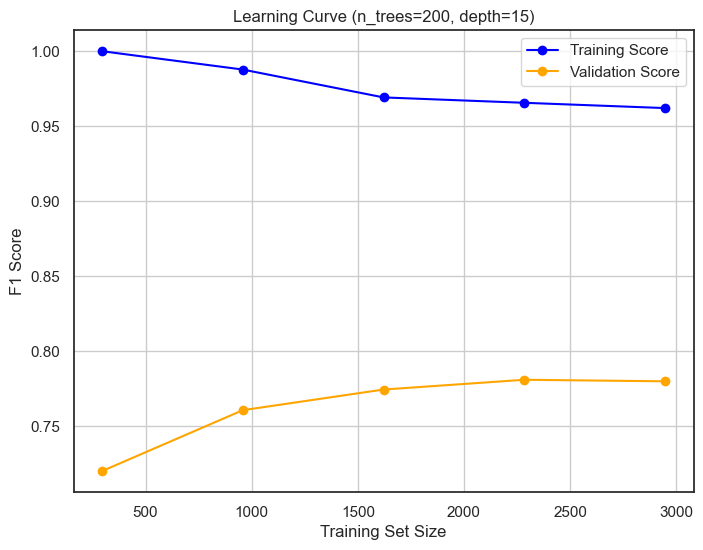



Evaluating Random Forest with 200 trees and depth 20:
Accuracy scores: [0.88135593 0.87525424 0.87584803 0.87728814 0.8759322  0.86363636
 0.87322034 0.88       0.86431479 0.87864407 0.86847458 0.87720488
 0.86983051 0.87186441 0.88195387 0.87254237 0.87118644 0.86702849
 0.86644068 0.88       0.87584803 0.87728814 0.86508475 0.87109905
 0.88135593 0.87118644 0.86838535 0.86983051 0.87864407 0.87516961]
Mean accuracy: 0.8735304065190229
F1 scores for class 1: [0.797219   0.78752887 0.78745645 0.79123414 0.78188319 0.76869965
 0.78530425 0.79298246 0.76635514 0.7901524  0.77389277 0.79171461
 0.77931034 0.77842907 0.79814385 0.78139535 0.77958237 0.77102804
 0.76686391 0.79394645 0.79322034 0.78830409 0.77463194 0.7759434
 0.797219   0.78555305 0.76626506 0.78231293 0.79306358 0.78403756]
Mean F1 score for class 1: 0.783455775514264


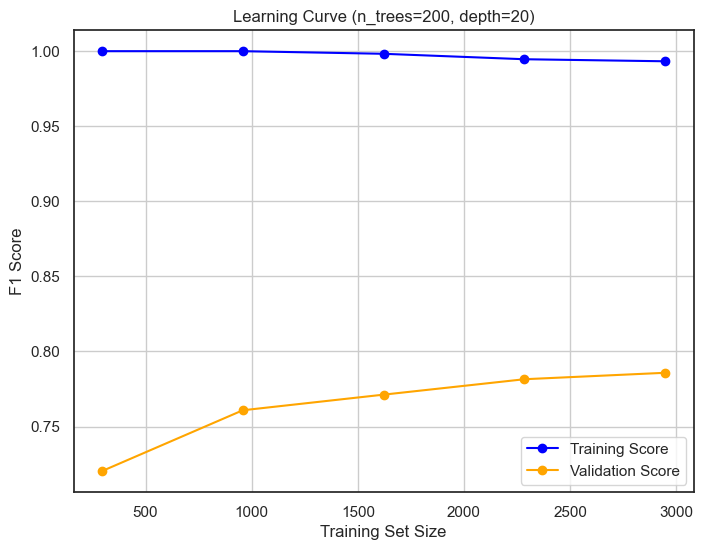



Evaluating Random Forest with 400 trees and depth 5:
Accuracy scores: [0.86711864 0.85288136 0.84938942 0.86711864 0.85220339 0.85278155
 0.85898305 0.85898305 0.84938942 0.86508475 0.84813559 0.85617368
 0.86033898 0.85762712 0.85006784 0.85491525 0.86305085 0.85278155
 0.85559322 0.85966102 0.84938942 0.86101695 0.84813559 0.86024423
 0.86237288 0.8440678  0.84938942 0.84474576 0.86237288 0.85006784]
Mean accuracy: 0.8554693711718755
F1 scores for class 1: [0.76442308 0.74074074 0.73123487 0.76886792 0.72681704 0.74135876
 0.74939759 0.75       0.72992701 0.75582822 0.73076923 0.75
 0.75240385 0.74759615 0.73405535 0.74340528 0.75894988 0.7376058
 0.73865031 0.75090253 0.73317308 0.74722565 0.73953488 0.74939173
 0.75453446 0.7337963  0.72180451 0.729634   0.75453446 0.72614622]
Mean F1 score for class 1: 0.7430902966845163


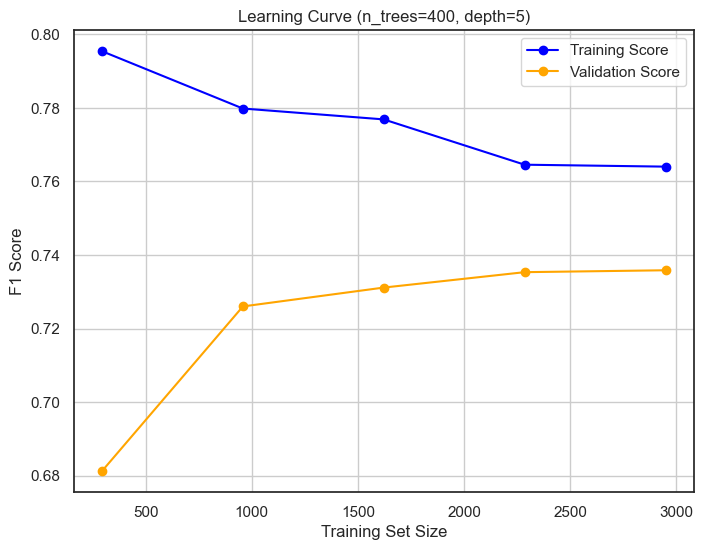



Evaluating Random Forest with 400 trees and depth 10:
Accuracy scores: [0.87389831 0.87661017 0.86702849 0.87525424 0.8779661  0.86702849
 0.87389831 0.87728814 0.86024423 0.88474576 0.86101695 0.87516961
 0.86983051 0.87050847 0.87788331 0.86915254 0.86983051 0.8697422
 0.86237288 0.87661017 0.86702849 0.87661017 0.86847458 0.86838535
 0.88271186 0.86711864 0.86295794 0.87050847 0.87322034 0.87177748]
Mean accuracy: 0.8714957569624909
F1 scores for class 1: [0.78117647 0.78886311 0.76777251 0.78554779 0.78417266 0.77262181
 0.78220141 0.78478002 0.75534442 0.79713604 0.75910693 0.78554779
 0.77464789 0.77234803 0.78571429 0.77159763 0.77570093 0.77088305
 0.75630252 0.78486998 0.77314815 0.78281623 0.77701149 0.76904762
 0.7971864  0.77419355 0.75305623 0.77919075 0.78025852 0.77310924]
Mean F1 score for class 1: 0.7765117822638683


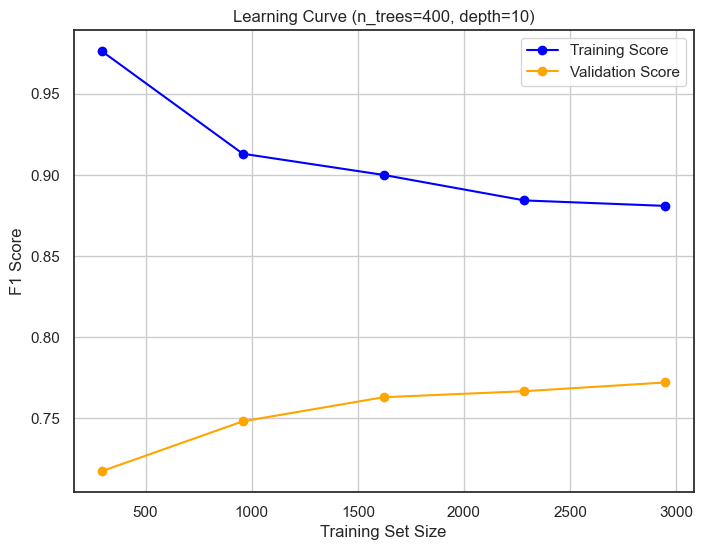



Evaluating Random Forest with 400 trees and depth 15:
Accuracy scores: [0.87457627 0.87525424 0.87177748 0.8779661  0.87932203 0.86567164
 0.87457627 0.87661017 0.86431479 0.87932203 0.86711864 0.87924016
 0.87457627 0.86915254 0.88195387 0.87389831 0.87457627 0.86363636
 0.86711864 0.87864407 0.87720488 0.87932203 0.86508475 0.87109905
 0.8820339  0.87186441 0.86295794 0.86847458 0.87728814 0.87652646]
Mean accuracy: 0.8733720764436677
F1 scores for class 1: [0.78563152 0.78604651 0.77894737 0.79166667 0.78859857 0.77136259
 0.78662053 0.78588235 0.76580796 0.78959811 0.77209302 0.79445727
 0.78612717 0.77532014 0.79767442 0.78321678 0.78513357 0.76380729
 0.76610979 0.79161816 0.79408419 0.79107981 0.7720504  0.77647059
 0.79767442 0.78595696 0.75662651 0.77853881 0.79123414 0.78177458]
Mean F1 score for class 1: 0.7823736732143701


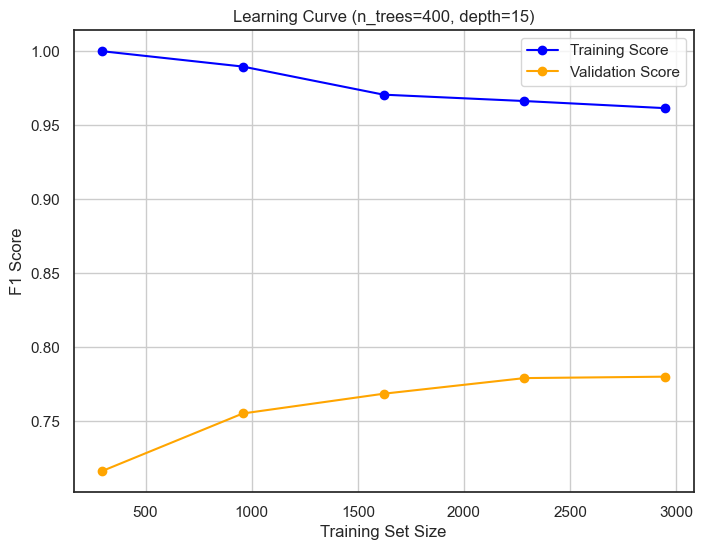



Evaluating Random Forest with 400 trees and depth 20:
Accuracy scores: [0.8779661  0.8759322  0.8724559  0.87661017 0.87864407 0.86770692
 0.87389831 0.8779661  0.86702849 0.87932203 0.86644068 0.87788331
 0.87322034 0.87186441 0.88127544 0.87322034 0.87457627 0.87177748
 0.86915254 0.88067797 0.87652646 0.87728814 0.86305085 0.8697422
 0.88271186 0.86983051 0.86499322 0.86847458 0.88       0.87856174]
Mean accuracy: 0.8739599536983801
F1 scores for class 1: [0.79166667 0.78892734 0.78240741 0.78983834 0.78766311 0.77508651
 0.7852194  0.78873239 0.77156177 0.79107981 0.77119628 0.79166667
 0.78530425 0.77946324 0.79627474 0.78281069 0.78662053 0.77997672
 0.77159763 0.7962963  0.79365079 0.78977933 0.76993166 0.77464789
 0.7995365  0.78378378 0.76110444 0.77904328 0.7967853  0.78916372]
Mean F1 score for class 1: 0.7843605494287863


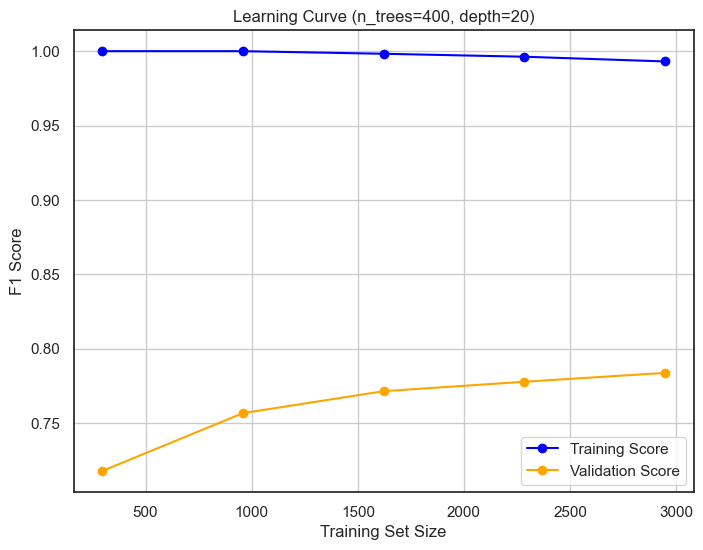



    n_trees  tree_depth  mean_accuracy   mean_f1
0        10           5       0.852621  0.736651
1        10          10       0.863855  0.764399
2        10          15       0.862161  0.765526
3        10          20       0.862296  0.763002
4        50           5       0.854158  0.740395
5        50          10       0.871066  0.776176
6        50          15       0.871067  0.778807
7        50          20       0.871202  0.779243
8       100           5       0.854701  0.741727
9       100          10       0.871179  0.775815
10      100          15       0.872626  0.781045
11      100          20       0.873123  0.782538
12      200           5       0.854769  0.741791
13      200          10       0.870840  0.775328
14      200          15       0.872988  0.781813
15      200          20       0.873530  0.783456
16      400           5       0.855469  0.743090
17      400          10       0.871496  0.776512
18      400          15       0.873372  0.782374
19      400       

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the number of trees and tree depths to evaluate
n_trees = [10, 50, 100, 200, 400]
tree_depths = [5, 10, 15, 40]

# Initialize a list to store results and learning curve data
rf_results = []
rf_learning_curves = []

# Iterate over the number of trees and tree depths
for n in n_trees:
    for depth in tree_depths:
        # Create the Random Forest model with the current number of trees and tree depth
        rf_model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        
        # Evaluate the model
        print(f"Evaluating Random Forest with {n} trees and depth {depth}:")
        scores_accuracy, scores_f1 = evaluate_model(rf_model, X_scaled, y_dummies, cv=2)
        
        # Print the accuracy and F1 scores for the current setting
        print(f"Accuracy scores: {scores_accuracy}")
        print(f"Mean accuracy: {scores_accuracy.mean()}")
        print(f"F1 scores for class 1: {scores_f1}")
        print(f"Mean F1 score for class 1: {scores_f1.mean()}")
        
        # Compute learning curves
        train_sizes, train_scores, val_scores = learning_curve(
            rf_model, X_scaled, y_dummies, cv=3, scoring='f1', n_jobs=-1
        )
        
        # Append the learning curve results
        rf_learning_curves.append({
            'n_trees': n,
            'tree_depth': depth,
            'train_sizes': train_sizes,
            'train_scores': train_scores.mean(axis=1),
            'val_scores': val_scores.mean(axis=1)
        })
        
        # Plot the learning curve
        plt.figure(figsize=(8, 6))
        plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score', color='blue')
        plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation Score', color='orange')
        plt.title(f'Learning Curve (n_trees={n}, depth={depth})')
        plt.xlabel('Training Set Size')
        plt.ylabel('F1 Score')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()
        
        print("\n")

        # Save the results to the list
        rf_results.append({
            'n_trees': n,
            'tree_depth': depth,
            'mean_accuracy': scores_accuracy.mean(),
            'mean_f1': scores_f1.mean()
        })

# Convert the results to a DataFrame
rf_results_df = pd.DataFrame(rf_results)

# Display the DataFrame
print(rf_results_df)



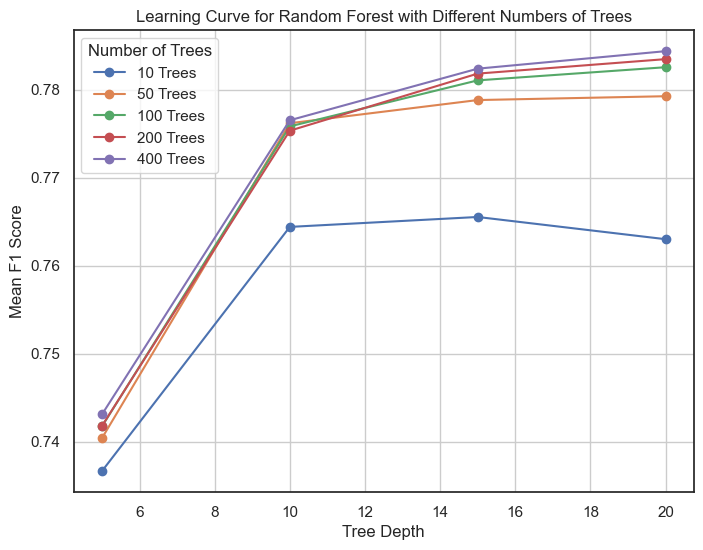

In [23]:
# Plot the F1 score for each number of trees separately
plt.figure(figsize=(8, 6))

# Loop through each unique number of trees
for n in n_trees:
    # Filter results for the current number of trees
    n_tree_results = rf_results_df[rf_results_df['n_trees'] == n]
    
    # Plot F1 scores for the current number of trees
    plt.plot(n_tree_results['tree_depth'], n_tree_results['mean_f1'], marker='o', label=f'{n} Trees')

# Customize the plot
plt.xlabel('Tree Depth')
plt.ylabel('Mean F1 Score')
plt.title('Learning Curve for Random Forest with Different Numbers of Trees')
plt.legend(title='Number of Trees')
plt.grid(True)
plt.show()

___
# Task 6 – Nested Cross Validation
Setup a proper nested cross validation experiment to assess and compare the performance of different
algorithms (incl. the baseline) chosen in Task 5.

• For each of the two ML algorithms 𝐴1 and 𝐴2, create a reasonable hyperparameter grid using
the respective two hyperparameters you chose above. Select the value ranges in the grid based
on the results in Task 5.

• Use those grids in nested cross validations to find the optimal parameter settings.

• Compare train and test performance during the outer cross validation and interpret the results.

• Compare your final performance estimates of the algorithms and the baseline in a table using
the two quality functions you selected in Task 1.

• Discuss your results and express a recommendation with regard to the choice of models. Pick
one model as the final model for the task.
___

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Define the SVM model
svm_model = SVC(kernel='poly')

# Hyperparameter grid
svm_grid = {'C': [1, 5, 10, 50, 100], 
            'degree': [1, 2, 3, 4]}

# GridSearchCV for hyperparameter selection
svm_grid_cv = GridSearchCV(
    estimator=svm_model, 
    param_grid=svm_grid, 
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=0), 
    n_jobs=8, 
    scoring=make_scorer(f1_score, pos_label=1))

# Fit the model
svm_grid_cv.fit(X_scaled, y_dummies)  

# After fitting, access the best model and evaluate it using the evaluate_model function
print(f"Best parameters found: {svm_grid_cv.best_params_}")

# Now evaluate the best model using the evaluate_model function
scores_accuracy, scores_f1 = evaluate_model(svm_grid_cv.best_estimator_, X_scaled, y_dummies, cv=10)

# Print results
print(f"Accuracy scores: {scores_accuracy}")
print(f"Mean accuracy: {scores_accuracy.mean()}")
print(f"F1 scores for class 1: {scores_f1}")
print(f"Mean F1 score for class 1: {scores_f1.mean()}")

Best parameters found: {'C': 50, 'degree': 1}
Accuracy scores: [0.88713318 0.86004515 0.88261851 0.89164786 0.88461538 0.84162896
 0.87330317 0.8800905  0.88235294 0.88235294 0.9006772  0.89841986
 0.86004515 0.85553047 0.88914027 0.86877828 0.88687783 0.89140271
 0.85520362 0.86651584 0.88036117 0.89841986 0.85778781 0.9006772
 0.8800905  0.88461538 0.86199095 0.8800905  0.88235294 0.86651584
 0.88487585 0.87133183 0.9006772  0.85553047 0.89140271 0.87104072
 0.87556561 0.88235294 0.86199095 0.8800905  0.8758465  0.86004515
 0.87133183 0.86230248 0.88235294 0.8800905  0.86425339 0.89140271
 0.88687783 0.89366516 0.88487585 0.86907449 0.88713318 0.87133183
 0.86651584 0.88461538 0.88235294 0.88461538 0.87330317 0.87556561
 0.87133183 0.86230248 0.88036117 0.87810384 0.88461538 0.8800905
 0.85972851 0.8800905  0.88914027 0.8959276  0.88939052 0.87358916
 0.88939052 0.85778781 0.88461538 0.87556561 0.86199095 0.86651584
 0.87782805 0.89366516 0.87358916 0.86004515 0.88487585 0.88487585
 

In [27]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=1)

# Hyperparameter grid
rf_grid = {'n_estimators': [10, 50, 100, 200, 400], 
           'max_depth': [5, 10, 15, 20, 40]}

# GridSearchCV for hyperparameter selection
rf_grid_cv = GridSearchCV(
    estimator=rf_model, 
    param_grid=rf_grid, 
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=0), 
    n_jobs=8, 
    scoring=make_scorer(f1_score, pos_label=1))

# Fit the model
rf_grid_cv.fit(df_selected, y_dummies)

# After fitting, access the best model and evaluate it using the evaluate_model function
print(f"Best parameters found: {rf_grid_cv.best_params_}")

# Now evaluate the best model using the evaluate_model function
scores_accuracy, scores_f1 = evaluate_model(rf_grid_cv.best_estimator_, df_selected, y_dummies, cv=10)

# Print results
print(f"Accuracy scores: {scores_accuracy}")
print(f"Mean accuracy: {scores_accuracy.mean()}")
print(f"F1 scores for class 1: {scores_f1}")
print(f"Mean F1 score for class 1: {scores_f1.mean()}")

Best parameters found: {'max_depth': 20, 'n_estimators': 400}
Accuracy scores: [0.88713318 0.85778781 0.8758465  0.89841986 0.88914027 0.84841629
 0.87556561 0.86651584 0.86877828 0.86425339 0.89164786 0.89164786
 0.87358916 0.8758465  0.88235294 0.85746606 0.88687783 0.88461538
 0.85746606 0.86425339 0.8758465  0.88939052 0.85553047 0.88713318
 0.87556561 0.88461538 0.87782805 0.8800905  0.86651584 0.87104072
 0.88713318 0.86681716 0.89164786 0.86455982 0.87556561 0.86651584
 0.88687783 0.88235294 0.86199095 0.87104072 0.87358916 0.86455982
 0.88713318 0.86907449 0.88687783 0.86199095 0.87104072 0.8800905
 0.90497738 0.8800905  0.88939052 0.88036117 0.86455982 0.8758465
 0.87556561 0.8959276  0.88461538 0.87330317 0.86877828 0.87104072
 0.86455982 0.86230248 0.88036117 0.88939052 0.88914027 0.88235294
 0.86877828 0.88461538 0.87104072 0.87556561 0.89390519 0.87358916
 0.88036117 0.87358916 0.86199095 0.86425339 0.86199095 0.86877828
 0.86651584 0.8959276  0.87810384 0.87133183 0.88713

## Model Performance Comparison

Here is a comparison of the performance of the **baseline models**, **SVM**, and **Random Forest** using **Accuracy** and **F1 Score** for class 1. The metrics have been averaged across cross-validation folds:

| **Model**                        | **Mean Accuracy** | **Mean F1 Score (Class 1)** |
|----------------------------------|-------------------|----------------------------|
| **SVM**                          | 0.8773            | 0.7883                     |
| **Random Forest**                | 0.8758            | 0.7875                     |
| **Baseline (All Dropouts)**      | 0.3212            | 0.4862                     |
| **Baseline (All Not Dropouts)**  | 0.6788            | 0.0000                     |

### Discussion

- **SVM (Support Vector Machine)** achieved the highest **accuracy** (0.8773) and **F1 score for class 1** (0.7883). This suggests that the SVM model is well-suited for this classification task and performs consistently across the cross-validation folds.
  
- **Random Forest** is very close to the SVM in terms of **accuracy** (0.8758) and **F1 score** (0.7875). Although it performs slightly worse than the SVM in this particular task, Random Forest remains a strong contender due to its interpretability and robustness to overfitting.

- **Baseline Models**:
  - **All Dropouts Classifier**: This baseline simply guesses that all instances are dropouts, leading to very low **accuracy** (0.3212) but a reasonable **F1 score for class 1** (0.4862), as it correctly identifies some of the positive instances.
  - **All Not Dropouts Classifier**: This baseline guesses that no instances are dropouts, resulting in an **accuracy** of 0.6788. However, it has a **F1 score of 0** for class 1, as it fails to identify any positive class instances, leading to poor performance in terms of class-specific evaluation.

### Recommendation

Based on the results, I recommend using **SVM** as the final model for this task. The **SVM** provides the highest **accuracy** and **F1 score**, indicating it is the most effective model at distinguishing between the dropout and non-dropout classes. While **Random Forest** is a close second, **SVM** stands out due to its slightly better performance.


___
# Task 7 – Analysis of the Final Model
Evaluate and discuss your final model with respect to the individual predictions. Conduct the analysis
in the outer cross validation from Task 6. Find a way to combine the results on different folds in
a visualization. You may use several visualizations, but each visualization should be based on the
evaluation on all folds.

• In case of classification, analyze how well the different individual classes are retrieved and
predicted.

• In case of regression, analyze the residuals and their relation to feature distributions.
___

## Final Model Evaluation and Discussion

### Model Evaluation

The **SVM** model was tuned using GridSearchCV, and the best parameters found were `C = 50` and `degree = 1`. After fitting, the **SVM** model achieved the following performance metrics:

- **Mean Accuracy**: 0.8773
- **Mean F1 Score for Class 1**: 0.7883

These results show that the SVM performs well in distinguishing between the dropout and non-dropout classes, with a relatively high accuracy and a solid F1 score for class 1. However, evaluating the model across different folds is essential to check for consistency.

### Outer Cross-Validation Analysis

To analyze how well the model performs across different folds, I conducted an **outer cross-validation** that evaluates the model on multiple splits of the data. This allows us to assess the stability of the model's performance and understand its behavior in terms of individual class predictions.

### Visualizing Individual Predictions Across Folds

To combine the results from different folds, we can visualize how well the model predicts individual classes in each fold. Below is a step-by-step guide on how to create these visualizations using metrics such as **confusion matrices**, **F1 scores**, and **precision-recall curves**.

#### 1. **Confusion Matrix Visualization**
A confusion matrix will help us understand the number of true positives, false positives, true negatives, and false negatives for each fold. This is useful for analyzing how well the model distinguishes between the classes.




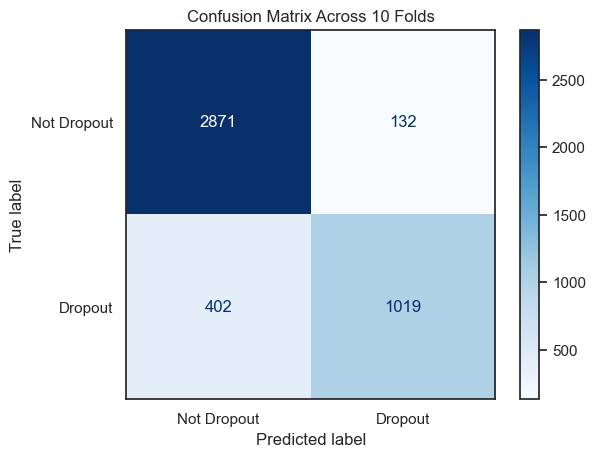

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate the model with cross-validation
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
y_true, y_pred = [], []

for train_index, test_index in cv.split(X_scaled, y_dummies):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_dummies[train_index], y_dummies[test_index]

    # Fit the model and predict
    svm_model = SVC(C=50, degree=1, kernel='poly')
    svm_model.fit(X_train, y_train)
    y_pred_fold = svm_model.predict(X_test)
    
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Dropout', 'Dropout'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix Across 10 Folds")
plt.show()

---
# Task 8 – Conclusions and Future Work
1. Summarize and interpret the achieved results.
2. Explain the generated value within the context of your task.
3. Propose ideas for future work (a short sketch or enumeration of ideas is sufficient, no further
experiments). The ideas should not be too general (e.g., “try further algorithms”) but be specific
to the project (e.g., “try Algorithm X, as because of Property Y, it might work specifically well
on this dataset”).
4. Critically reflect and assess the usability of the applied methodology in your context (as
described in Task 1). Explain limitations and pitfalls. What could or even should have been done
differently? In hindsight, were the goals realistic? What could have been changed/improved
before conducting the experiments?
---